# PROJECT : 
## ADVANCED REGRESSION :
Build a __regression model with regularisation__ to predict the __actual prices of house__, given the dataset of previous sale of houses in Australia.  <br>

## PROBLEM STATEMENT :
<br>A __US-based housing company__ named __Surprise Housing__ has decided to enter the Australian market. The company uses __data analytics__ to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.<br><br>
The company is looking at prospective properties to buy, to enter the market. A __regression model with regularisation__ is required in order to __predict the actual value of the prospective properties__ and decide whether to invest in them or not.<br><br>
The company wants to know:

> - __Which variables are significant in predicting the price of a house?__<br>
> - __How well those variables describe the price of a house?__<br>

### BUSINESS GOAL : 
We should build a model to predict the price of houses with the available independent variables. This model will then be used by the management to understand __how exactly the prices vary with the variables__. They can accordingly manipulate the __strategy of the firm__ and concentrate on areas that will __yield high returns__. Further, the model will be a good way for management to understand the __pricing dynamics__ of a new market. <br><br>
### Major parts of the project : 
>1. Data understanding
>2. Data cleaning 
>> a. Fixing missing values<br>
>> b. Fixing rows and columns<br>
>> c. Standardizing values<br>
>> d. Fixing Invalid values<br>
>> e. Treating Outliers<br>
>> f. Derived Variables<br>
>> g. Filtering Data<br>
>3. Exploratory Data Analysis (EDA) 
>4. Model Building
>> a. Data preparation<br>
>> b. Linear Regression (using RFE)<br>
>> c. Ridge regression<br>
>> d. Lasso regression<br>
>5. Interpretation of results

## Import required libraries

In [1]:
# Importing required libraries for the project

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import scale
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline

## 1. DATA UNDERSTANDING

### Read the "House Pricing details" dataset

In [2]:
# Reading the dataset

house_pricing_df = pd.read_csv("train.csv")

In [3]:
# First 10 records of the dataset

house_pricing_df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


### Shape of the dataset(rows,columns)

In [4]:
house_pricing_df.shape

(1460, 81)

#### Column names and their intended meanings

- __MSSubClass__ : Identifies the type of dwelling involved in the sale<br>
- __MSZoning__ : Identifies the general zoning classification of the sale<br>
- __LotFrontage__ : Linear feet of street connected to property<br>
- __LotArea__ : Lot size in square feet<br>
- __Street__ : Type of road access to property<br>
- __Alley__ : Type of alley access to property<br>
- __LotShape__ : General shape of property<br>
- __LandContour__ : Flatness of the property<br>
- __Utilities__ : Type of utilities available<br>
- __LotConfig__ : Lot configuration<br>
- __LandSlope__ : Slope of property<br>
- __Neighborhood__ : Physical locations within Ames city limits<br>
- __Condition1__ : Proximity to various conditions<br>
- __Condition2__ : Proximity to various conditions (if more than one is present)<br>
- __BldgType__ : Type of dwelling<br>
- __HouseStyle__ : Style of dwelling<br>
- __OverallQual__ : Rates the overall material and finish of the house<br>
- __OverallCond__ : Rates the overall condition of the house<br>
- __YearBuilt__ : Original construction date<br>
- __YearRemodAdd__ : Remodel date (same as construction date if no remodeling or additions)<br>
- __RoofStyle__ : Type of roof<br>
- __RoofMatl__ : Roof material<br>
- __Exterior1st__ : Exterior covering on house<br>
- __Exterior2nd__ : Exterior covering on house (if more than one material)<br>
- __MasVnrType__ : Masonry veneer type<br>
- __MasVnrArea__ : Masonry veneer area in square feet<br>
- __ExterQual__ : Evaluates the quality of the material on the exterior<br>
- __ExterCond__ : Evaluates the present condition of the material on the exterior<br>
- __Foundation__ : Type of foundation<br>
- __BsmtQual__ : Evaluates the height of the basement<br>
- __BsmtCond__ : Evaluates the general condition of the basement<br>
- __BsmtExposure__ : Refers to walkout or garden level walls<br>
- __BsmtFinType1__ : Rating of basement finished area<br>
- __BsmtFinSF1__ : Type 1 finished square feet<br>
- __BsmtFinType2__ : Rating of basement finished area (if multiple types)<br>
- __BsmtFinSF2__ : Type 2 finished square feet<br>
- __BsmtUnfSF__ : Unfinished square feet of basement area<br>
- __TotalBsmtSF__ : Total square feet of basement area<br>
- __Heating__ : Type of heating<br>
- __HeatingQC__ : Heating quality and condition<br>
- __CentralAir__ : Central air conditioning<br>
- __Electrical__ : Electrical system<br>
- __1stFlrSF__ : First Floor square feet<br>
- __2ndFlrSF__ : Second floor square feet<br>
- __LowQualFinSF__ : Low quality finished square feet (all floors)<br>
- __GrLivArea__ : Above grade (ground) living area square feet<br>
- __BsmtFullBath__ : Basement full bathrooms<br>
- __BsmtHalfBath__ : Basement half bathrooms<br>
- __FullBath__ : Full bathrooms above grade<br>
- __HalfBath__ : Half baths above grade<br>
- __Bedroom__ : Bedrooms above grade (does NOT include basement bedrooms)<br>
- __Kitchen__ : Kitchens above grade<br>
- __KitchenQual__ : Kitchen quality<br>
- __TotRmsAbvGrd__ : Total rooms above grade (does not include bathrooms)<br>
- __Functional__ : Home functionality (Assume typical unless deductions are warranted)<br>
- __Fireplaces__ : Number of fireplaces<br>
- __FireplaceQu__ : Fireplace quality<br>
- __GarageType__ : Garage location<br>
- __GarageYrBlt__ : Year garage was built<br>
- __GarageFinish__ : Interior finish of the garage<br>
- __GarageCars__ : Size of garage in car capacity<br>
- __GarageArea__ : Size of garage in square feet<br>
- __GarageQual__ : Garage quality<br>
- __GarageCond__ : Garage condition<br>
- __PavedDrive__ : Paved driveway<br>
- __WoodDeckSF__ : Wood deck area in square feet<br>
- __OpenPorchSF__ : Open porch area in square feet<br>
- __EnclosedPorch__ : Enclosed porch area in square feet<br>
- __3SsnPorch__ : Three season porch area in square feet<br>
- __ScreenPorch__ : Screen porch area in square feet<br>
- __PoolArea__ : Pool area in square feet<br>
- __PoolQC__ : Pool quality<br>
- __Fence__ : Fence quality<br>
- __MiscFeature__ : Miscellaneous feature not covered in other categories<br>
- __MiscVal__ : Value of miscellaneous feature <br>
- __MoSold__ : Month Sold (MM)<br>
- __YrSold__ : Year Sold (YYYY)<br>
- __SaleType__ : Type of sale<br>
- __SaleCondition__ : Condition of sale<br>

### Basic information of the dataset

In [5]:
house_pricing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### Inferences :
- The variables __'LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish ', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence' and 'MiscFeature'__ has missing values.
- There are __38__ numeric variables and __43__ variables of 'object' type.

### Description of the dataset

In [6]:
house_pricing_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## 2. DATA CLEANING 

### a. Fixing missing values

In [7]:
# Number of missing values in columns (descending order)

house_pricing_df.isnull().sum().sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
Id                 0
dtype: int64

In [8]:
# Percentage of missing values (column-wise) in descending order

round(100*(house_pricing_df.isnull().sum().sort_values(ascending=False)/len(house_pricing_df.index)), 2).head(20)

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageYrBlt      5.55
GarageCond       5.55
GarageType       5.55
GarageFinish     5.55
GarageQual       5.55
BsmtFinType2     2.60
BsmtExposure     2.60
BsmtQual         2.53
BsmtCond         2.53
BsmtFinType1     2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
Id               0.00
dtype: float64

In [9]:
# Dropping columns having missing values > 40%

house_pricing_df = house_pricing_df.loc[:, ~((100*house_pricing_df.isnull().sum()/len(house_pricing_df.index)) > 40.0)]

In [10]:
# Percentage of missing values (column-wise) in descending order after removing high missing value columns

round(100*(house_pricing_df.isnull().sum().sort_values(ascending=False)/len(house_pricing_df.index)), 2).head(20)

LotFrontage     17.74
GarageType       5.55
GarageCond       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
BsmtFinType2     2.60
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtCond         2.53
BsmtQual         2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
PavedDrive       0.00
WoodDeckSF       0.00
LowQualFinSF     0.00
GrLivArea        0.00
BsmtFullBath     0.00
BsmtHalfBath     0.00
dtype: float64

In [11]:
# Checking for the mean and median of the numeric variable 'LotFrontage' for imputation (% Missing value = 17.74%)

house_pricing_df['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [12]:
# The % of missing values is about 17.74% in 'LotFrontAge' which is relatively high.
# Imputating mean, median or null values by assumption may distort the analysis thereby we may not get intended inferences.
# Thus drop the column 'LotFrontage'.

house_pricing_df = house_pricing_df.drop("LotFrontage", axis = 1)

In [13]:
# Checking for the mean and median of the numeric variable 'MasVnrArea' for imputation (% Missing value = 0.55%)

house_pricing_df['MasVnrArea'].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [14]:
# Imputing the median value in places of missing values in 'MasVnrArea'

house_pricing_df['MasVnrArea'] = house_pricing_df['MasVnrArea'].fillna(house_pricing_df['MasVnrArea'].median())

In [15]:
# Checking for the relative occurance of values in 'GarageYrBlt' and 'YearBuilt'

house_pricing_df[house_pricing_df['GarageYrBlt']==house_pricing_df['YearBuilt']].shape

(1089, 75)

#### Inference :
About (1089/1460) __74.6%__ of the values in 'GarageYrBlt' is same as the 'YearBuilt' which means that in most of the cases the garage was built when the house was originally built.

In [16]:
'''

Since the probability of exactly same values occuring in both 'GarageYrBlt' and 'YearBuilt' is about 74.6%,
let us impute the missing values of 'GarageYrBlt' with the corresponding 'YearBuilt' values.

Also, this missing value imputation is done only for 5.55% of the records which doesnot impact the inferences largely.
Convert the dataype of 'GarageYrBlt' to integer.

'''
house_pricing_df['GarageYrBlt'] = (house_pricing_df['GarageYrBlt'].fillna(house_pricing_df['YearBuilt'])).astype("int64")

In [17]:
# Checking for the value_counts() of categorical missing-value variables

value_counts_list = ['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
                     'Electrical', 'GarageType', 'GarageFinish', 'GarageQual','GarageCond']
for i in value_counts_list:
    print(house_pricing_df[i].value_counts())

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64
TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64
TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64
No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64
Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64
Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64
TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64
TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64


In [18]:
# The column 'Electrical' has very low missing values of about 0.07%.
# So imputing the mode(most frequently occurring value) doesnot affect the inferences more.


house_pricing_df['Electrical'] = house_pricing_df['Electrical'].fillna("SBrkr")

In [19]:
'''
The variables 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'GarageType',
'GarageYrBlt', 'GarageQual', 'GarageFinish' and 'GarageCond' have missing values ranging from 0.55% - 5.55%. 

Imputing the mode value or other values by assumption may distort the analysis and correctness of the inferences.

The dataset itself contains relatively meagre amount of data and so removing the rows containing missing values
may lead to further loss of data. 

So it is better to treat them as missing values itself and fill them with corresponding "NAN" values.
'''

house_pricing_df['MasVnrType'] = house_pricing_df['MasVnrType'].fillna("None")
house_pricing_df[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']] = house_pricing_df[['BsmtQual',
                  'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']].fillna("No Basement")
house_pricing_df[['GarageType', 'GarageQual', 'GarageFinish', 'GarageCond']] = house_pricing_df[['GarageType', 'GarageQual',
                  'GarageFinish', 'GarageCond']].fillna("No Garage")

In [20]:
# Checking for the overall null values after imputation

house_pricing_df.isnull().sum().sum()

0

In [21]:
# Shape of the dataframe after fixing missing values

house_pricing_df.shape

(1460, 75)

### b. Fixing rows and columns

In [22]:
# Checking for duplicate rows

house_pricing_df.duplicated().sum()

0

#### Inference - There are no duplicate rows available in the dataset.

In [23]:
# Drop the column 'Id' as it has no significance in analysis

house_pricing_df = house_pricing_df.drop('Id', axis=1)

In [24]:
# Analysing the unique values of each columns in the dataframe 

pd. set_option("display.max_rows", None)
house_pricing_df.apply(lambda x : x.unique())

MSSubClass       [60, 20, 70, 50, 190, 45, 90, 120, 30, 85, 80,...
MSZoning                                 [RL, RM, C (all), FV, RH]
LotArea          [8450, 9600, 11250, 9550, 14260, 14115, 10084,...
Street                                                [Pave, Grvl]
LotShape                                      [Reg, IR1, IR2, IR3]
LandContour                                   [Lvl, Bnk, Low, HLS]
Utilities                                         [AllPub, NoSeWa]
LotConfig                      [Inside, FR2, Corner, CulDSac, FR3]
LandSlope                                          [Gtl, Mod, Sev]
Neighborhood     [CollgCr, Veenker, Crawfor, NoRidge, Mitchel, ...
Condition1       [Norm, Feedr, PosN, Artery, RRAe, RRNn, RRAn, ...
Condition2       [Norm, Artery, RRNn, Feedr, PosN, PosA, RRAn, ...
BldgType                     [1Fam, 2fmCon, Duplex, TwnhsE, Twnhs]
HouseStyle       [2Story, 1Story, 1.5Fin, 1.5Unf, SFoyer, SLvl,...
OverallQual                        [7, 6, 8, 5, 9, 4, 10, 3, 1

In [25]:
'''
'YearBuilt', 'YearRemodAdd' and 'GarageYrBlt' are of numeric datatypes. To make it more meaningful, let us derive columns 
describing the age of house from the year it was built or remodelled and the age of garage. 

The variables to be derived are :

'Age_from_YearBuilt' ---> Age of the house from the year it was originally built to the year it was sold.
'Age_from_YearRemodelled' ---> Age of the house from the year it was remodelled to the year it was sold.
'Age_of_Garage' ---> Age of the garage from the year it was built to the year it was sold.

'''
house_pricing_df['Age_from_YearBuilt'] = house_pricing_df['YrSold']-house_pricing_df['YearBuilt']
house_pricing_df['Age_from_YearRemodelled'] = house_pricing_df['YrSold']-house_pricing_df['YearRemodAdd']
house_pricing_df['Age_of_Garage'] = house_pricing_df['YrSold']-house_pricing_df['GarageYrBlt']


In [26]:
# Drop the columns 'YearBuilt', 'YearRemodAdd' and 'GarageYrBlt' after deriving new variables

house_pricing_df = house_pricing_df.drop(['YearBuilt','YearRemodAdd','GarageYrBlt'], axis = 1)

In [27]:
# Shape of the dataframe after fixing rows and columns

house_pricing_df.shape

(1460, 74)

### c. Standardizing values

In [28]:
# As all values of 'MasVnrArea' are already rounded off, let us change its type to 'int'

house_pricing_df['MasVnrArea'] = house_pricing_df['MasVnrArea'].astype("int64")

### d. Fixing Invalid values

In [29]:
# Description of numerical variables

pd. set_option("display.max_columns", None)
house_pricing_df.describe()

,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Age_from_YearBuilt,Age_from_YearRemodelled,Age_of_Garage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,10516.828082,6.099315,5.575342,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890,36.547945,22.950000,31.308219
std,42.300571,9981.264932,1.382997,1.112799,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883,30.250152,20.640653,26.353339
min,20.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000,0.000000,-1.000000,0.000000
25%,20.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000,8.000000,4.000000,7.000000
50%,50.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000,35.000000,14.000000,30.000000
75%,70.000000,11601.500000,7.000000,6.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000,54.000000,41.000000,49.000000
max,190.000000,215245.000000,10.000000,9.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000,136.000000,60.000000,136.000000


#### Inference :
The variable __'Age_from_YearRemodelled'__ has minimum value of __-1__ which is invalid. (Since the date of remodelling is after the date of house sold, we get -1 here which is chronologically wrong). This has to be fixed by removing the invalid data.

In [30]:
# Drop the record that contains data which is chronologically wrong

house_pricing_df = house_pricing_df[~(house_pricing_df['Age_from_YearRemodelled']==-1)]

In [31]:
# Shape of the dataframe after fixing invalid data

house_pricing_df.shape

(1459, 74)

### e. Treating Outliers

In [32]:
# Description of numerical variables with various quantile values to check for outliers

house_pricing_df.describe([0.01,0.02,0.05,0.10,0.25,0.50,0.75,0.90,0.95,0.99])

,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Age_from_YearBuilt,Age_from_YearRemodelled,Age_of_Garage
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,56.895134,10496.555860,6.096642,5.575737,102.665524,442.394791,46.581220,567.027416,1056.003427,1161.272790,346.176148,5.848526,1513.297464,0.424949,0.057574,1.564085,0.382454,2.866347,1.046607,6.514736,0.612748,1.766278,472.698424,94.166552,46.413982,21.969157,3.411926,15.071282,2.760795,43.518849,6.319397,2007.816313,180918.571624,36.572995,22.966415,31.329678
std,42.314997,9954.574954,1.379691,1.113079,179.967423,453.766233,161.369977,441.943479,435.457633,383.241975,435.561934,48.639512,519.098418,0.518870,0.238830,0.549821,0.502798,0.816050,0.220410,1.621705,0.644808,0.746873,213.606916,125.346347,65.606770,61.137400,29.327247,55.775138,40.191018,496.291826,2.702836,1.328379,79469.678565,30.245373,20.638195,26.349612
min,20.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000,0.000000,0.000000,0.000000
1%,20.000000,1680.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,520.000000,0.000000,0.000000,692.160000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,61802.140000,0.000000,0.000000,0.000000
2%,20.000000,2123.880000,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,583.400000,0.000000,0.000000,768.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,79000.000000,0.000000,0.000000,0.000000
5%,20.000000,3307.400000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,518.600000,672.900000,0.000000,0.000000,848.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2006.000000,88000.000000,1.000000,0.000000,0.000000
10%,20.000000,5000.000000,5.000000,5.000000,0.000000,0.000000,0.000000,74.800000,636.800000,756.800000,0.000000,0.000000,912.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,240.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,2006.000000,106450.000000,1.000000,1.000000,1.000000
25%,20.000000,7549.000000,5.000000,5.000000,0.000000,0.000000,0.000000,223.000000,795.500000,882.000000,0.000000,0.000000,1129.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,333.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129950.000000,8.000000,4.000000,7.000000
50%,50.000000,9477.000000,6.000000,5.000000,0.000000,383.000000,0.000000,476.000000,991.000000,1086.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000,35.000000,14.

In [33]:
# Selecting numerical columns of the dataframe

df = house_pricing_df.select_dtypes(include = ['float64','int64'])

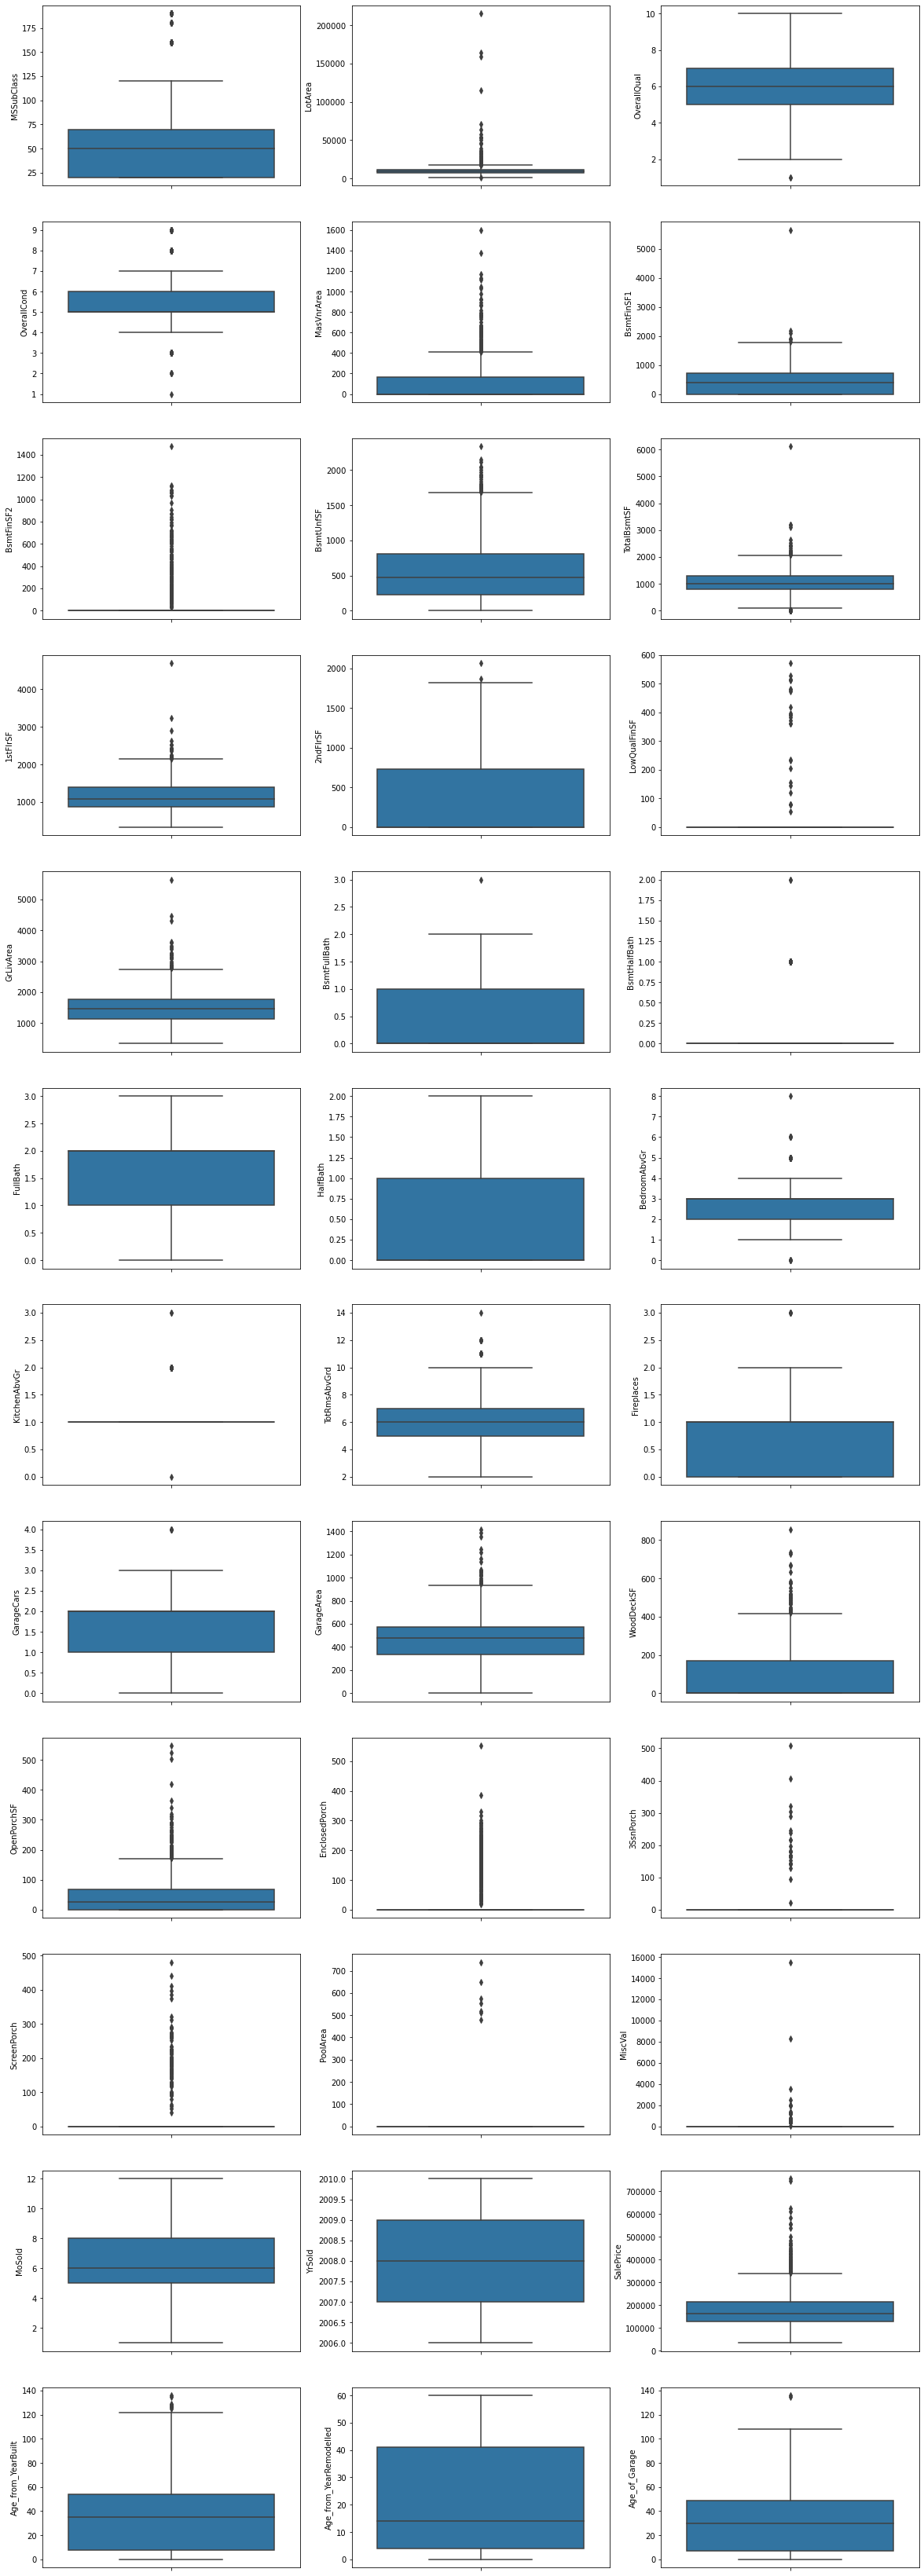

In [34]:
# Boxplots are plotted for numerical columns to check for outliers

plt.figure(figsize=(20,60))
for i in range(len(df.columns)):
    plt.subplot(12, 3, i + 1)
    sns.boxplot(y = df.columns[i], data = house_pricing_df)
plt.show()

#### Inference :
Clearly the variables __'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice', 'Age_from_YearBuilt' and 'Age_of_Garrage'__ have outliers.

In [35]:
'''
From the analysis of boxplots and the quartile values for each numerical variables, it is evident that our data contains
more outliers and hence to be treated.To handle these outliers we shall use IQR(Inter Quartile Range) defining Q1 and Q3.
If we do so, we may end up losing more influential values as we have only meagre amount of data.

Hence, analysing these variables with boxplots, we shall remove the outliers that are relatively skewed more beyond a 
specific point. Let us manually remove them from these variables, thereby not losing much influential data.

'''

house_pricing_df = house_pricing_df[~(house_pricing_df['LotArea']>100000)]

house_pricing_df = house_pricing_df[~(house_pricing_df['OverallQual']<2)]

house_pricing_df = house_pricing_df[~(house_pricing_df['OverallCond']<2)]

house_pricing_df = house_pricing_df[~(house_pricing_df['MasVnrArea']>1200)]

house_pricing_df = house_pricing_df[~(house_pricing_df['BsmtFinSF1']>2200)]

house_pricing_df = house_pricing_df[~(house_pricing_df['BsmtFinSF2']>1100)]

house_pricing_df = house_pricing_df[~(house_pricing_df['BsmtUnfSF']>2300)]

house_pricing_df = house_pricing_df[~(house_pricing_df['TotalBsmtSF']>2700)]

house_pricing_df = house_pricing_df[~(house_pricing_df['1stFlrSF']>2700)]

house_pricing_df = house_pricing_df[~(house_pricing_df['2ndFlrSF']>1800)]

house_pricing_df = house_pricing_df[~(house_pricing_df['GrLivArea']>3700)]

house_pricing_df = house_pricing_df[~(house_pricing_df['BsmtFullBath']>2)]

house_pricing_df = house_pricing_df[~(house_pricing_df['BedroomAbvGr']>6)]

house_pricing_df = house_pricing_df[~(house_pricing_df['TotRmsAbvGrd']>12)]

house_pricing_df = house_pricing_df[~(house_pricing_df['Fireplaces']>2)]

house_pricing_df = house_pricing_df[~(house_pricing_df['GarageCars']>3)]

house_pricing_df = house_pricing_df[~(house_pricing_df['GarageArea']>1300)]

house_pricing_df = house_pricing_df[~(house_pricing_df['WoodDeckSF']>600)]

house_pricing_df = house_pricing_df[~(house_pricing_df['OpenPorchSF']>350)]

house_pricing_df = house_pricing_df[~(house_pricing_df['SalePrice']>650000)]

house_pricing_df = house_pricing_df[~(house_pricing_df['Age_of_Garage']>120)]

In [36]:
# Shape of the dataframe after removing outliers

house_pricing_df.shape

(1415, 74)

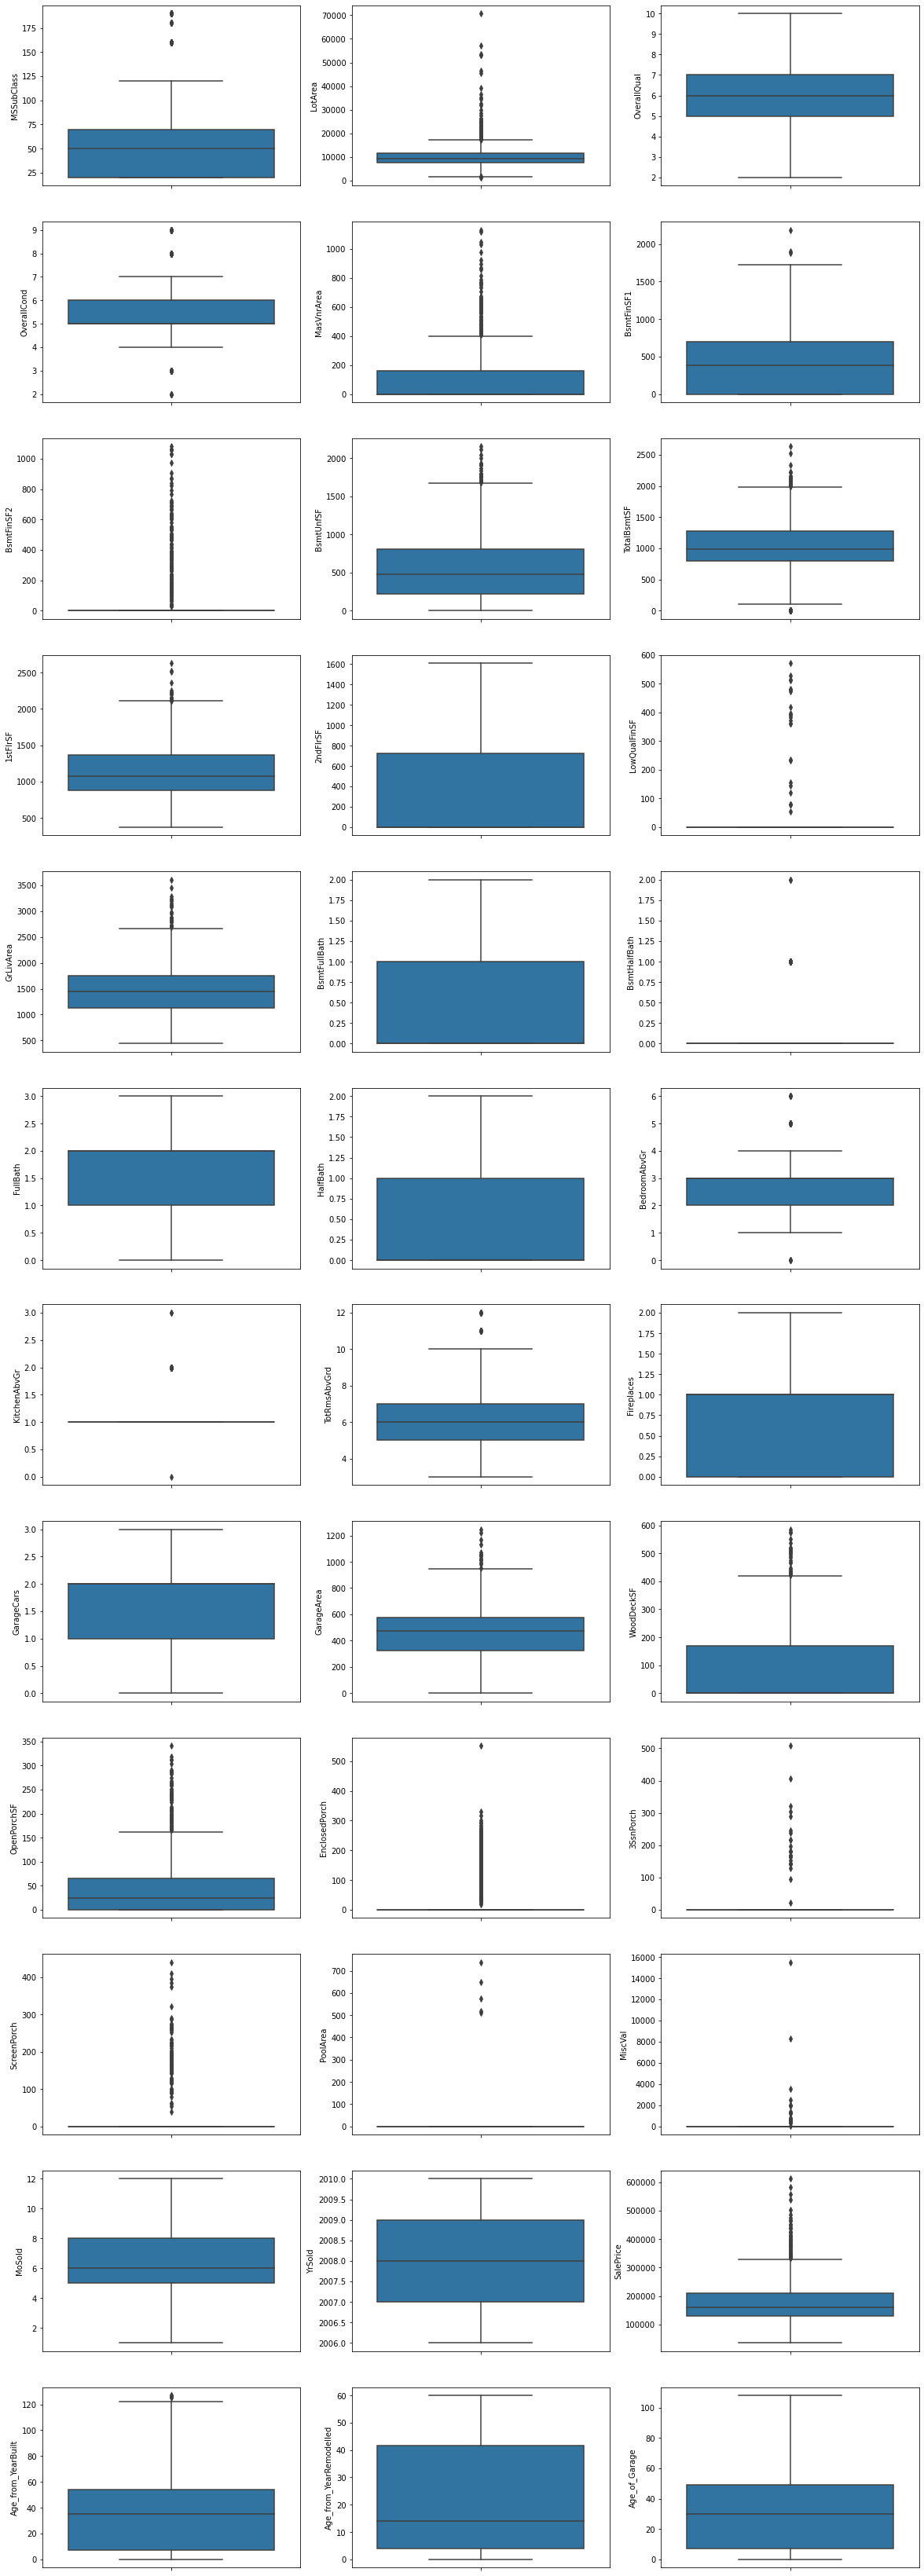

In [37]:
# Boxplots are plotted for numerical columns to check for outliers

df = house_pricing_df.select_dtypes(include = ['float64','int64'])
plt.figure(figsize=(20,60))
for i in range(len(df.columns)):
    plt.subplot(12, 3, i + 1)
    sns.boxplot(y = df.columns[i], data = house_pricing_df)
plt.show()

### f. Derived Variables

In [38]:
'''
From the boxplots, we can observe that some of the numerical variables in the dataset are skewed with more number of 0s.
Log transformation is used to transform skewed data to approximately conform to normality. Largely skewed data might fail 
to train a robust model. Thus, we use Log transformation to shrink the boundary thereby treating outliers and also skewness
to some extent. The skewed variables are stored in the list named 'skewed_var_list'.

'''
skewed_var_list = ['BsmtFinSF2','LowQualFinSF','BsmtHalfBath','KitchenAbvGr',
                   'EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal']

In [39]:
''' 
Log transformation of skewed variables : 
Log transformation works well with data that has positive values (neither zero nor negative).
Hence here we use log(x+1) as we have more number of 0s in the skewed data. 

'''
log_numerical = np.log(house_pricing_df[skewed_var_list]+1)

In [40]:
# Concatenate the transformed log values to the house_pricing_df

house_pricing_df = pd.concat([house_pricing_df, log_numerical.add_prefix("Log_")], axis=1)

In [41]:
# Round off float values

house_pricing_df[['Log_BsmtFinSF2','Log_LowQualFinSF','Log_BsmtHalfBath','Log_KitchenAbvGr','Log_EnclosedPorch',
                  'Log_3SsnPorch','Log_ScreenPorch','Log_PoolArea','Log_MiscVal']] = house_pricing_df[['Log_BsmtFinSF2',
                  'Log_LowQualFinSF','Log_BsmtHalfBath','Log_KitchenAbvGr','Log_EnclosedPorch','Log_3SsnPorch',
                  'Log_ScreenPorch','Log_PoolArea','Log_MiscVal']].apply(lambda x : round(x,2))

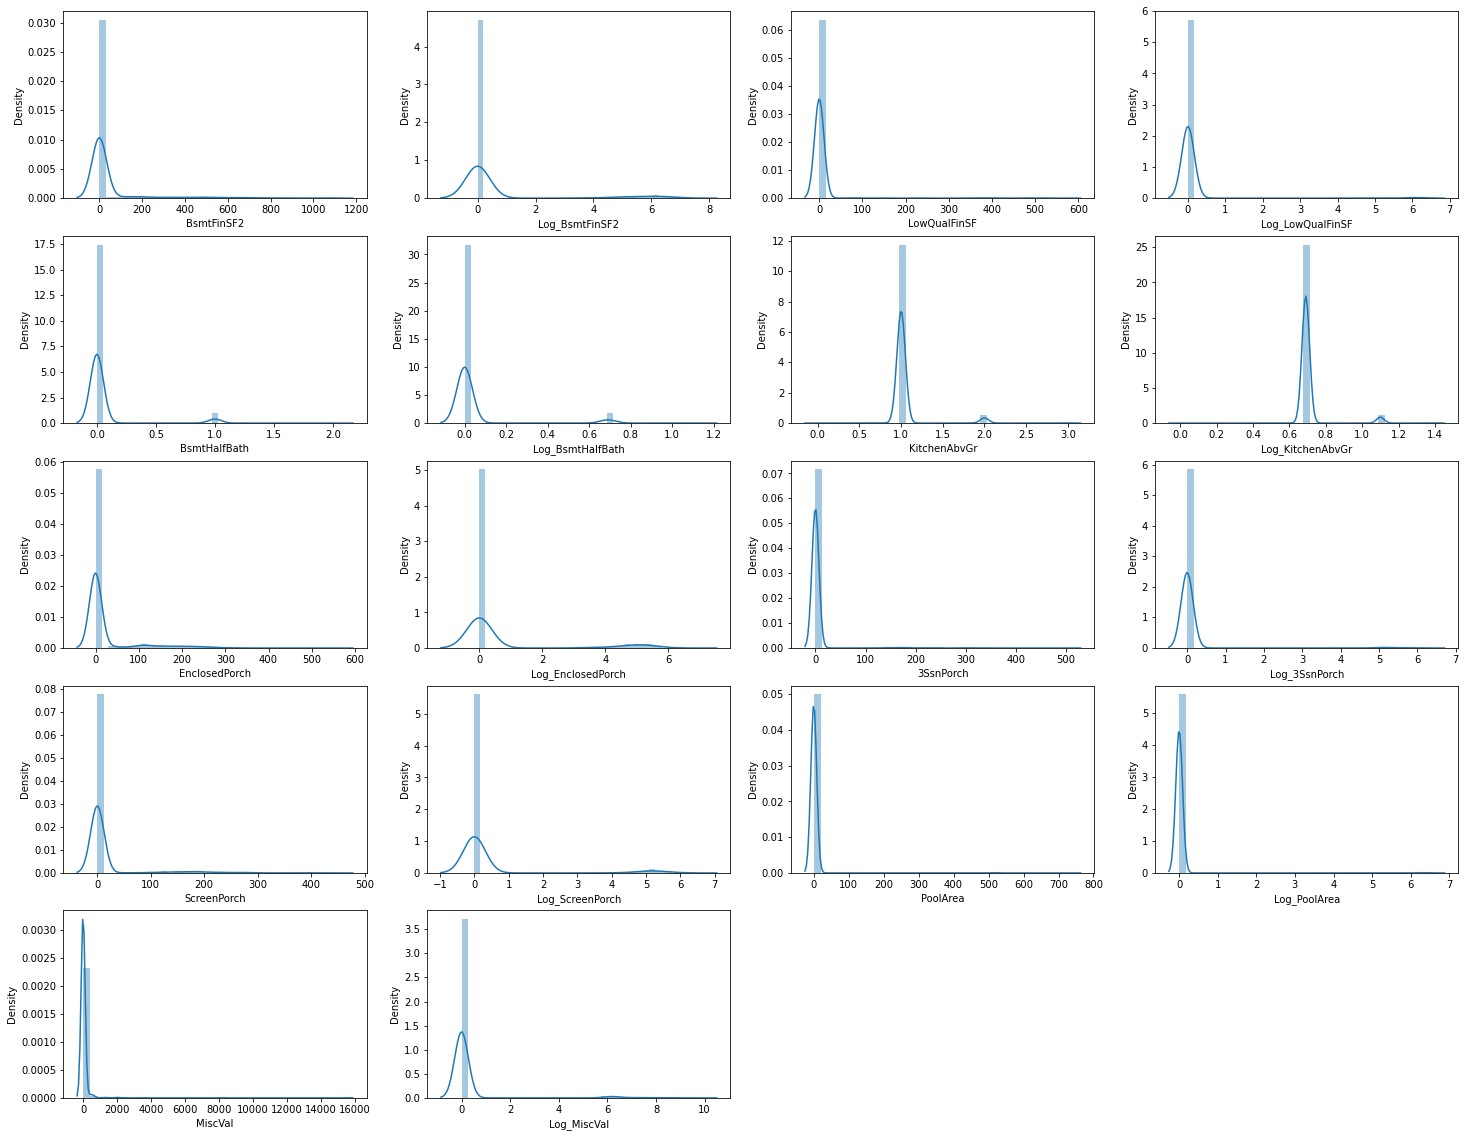

In [42]:
var_list = house_pricing_df[['BsmtFinSF2','Log_BsmtFinSF2','LowQualFinSF','Log_LowQualFinSF','BsmtHalfBath',
                             'Log_BsmtHalfBath','KitchenAbvGr','Log_KitchenAbvGr','EnclosedPorch','Log_EnclosedPorch',
                             '3SsnPorch','Log_3SsnPorch','ScreenPorch','Log_ScreenPorch','PoolArea','Log_PoolArea',
                             'MiscVal','Log_MiscVal']]
plt.figure(figsize=(25,20))
j=0
for i in var_list.columns:
    plt.subplot(5, 4, j + 1)
    sns.distplot(var_list[i])
    j = j+1
plt.show()

#### Inference :
After log transformation, the skewness is drastically reduced in most of the variables while some are still skewed.

In [43]:
# Drop the skewed variables as we have the transformed ones now in the dataset

house_pricing_df = house_pricing_df.drop(skewed_var_list, axis = 1)

In [44]:
# Shape of the dataset after treating outliers and handling skewed data

house_pricing_df.shape

(1415, 74)

In [45]:
# First 10 records of the dataset

house_pricing_df.head(10)

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Age_from_YearBuilt,Age_from_YearRemodelled,Age_of_Garage,Log_BsmtFinSF2,Log_LowQualFinSF,Log_BsmtHalfBath,Log_KitchenAbvGr,Log_EnclosedPorch,Log_3SsnPorch,Log_ScreenPorch,Log_PoolArea,Log_MiscVal
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,150,856,GasA,Ex,Y,SBrkr,856,854,1710,1,2,1,3,Gd,8,Typ,0,Attchd,RFn,2,548,TA,TA,Y,0,61,2,2008,WD,Normal,208500,5,5,5,0.0,0.0,0.00,0.69,0.00,0.00,0.0,0.0,0.00
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,284,1262,GasA,Ex,Y,SBrkr,1262,0,1262,0,2,0,3,TA,6,Typ,1,Attchd,RFn,2,460,TA,TA,Y,298,0,5,2007,WD,Normal,181500,31,31,31,0.0,0.0,0.69,0.69,0.00,0.00,0.0,0.0,0.00
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,434,920,GasA,Ex,Y,SBrkr,920,866,1786,1,2,1,3,Gd,6,Typ,1,Attchd,RFn,2,608,TA,TA,Y,0,42,9,2008,WD,Normal,223500,7,6,7,0.0,0.0,0.00,0.69,0.00,0.00,0.0,0.0,0.00
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,540,756,GasA,Gd,Y,SBrkr,961,756,1717,1,1,0,3,Gd,7,Typ,1,Detchd,Unf,3,642,TA,TA,Y,0,35,2,2006,WD,Abnorml,140000,91,36,8,0.0,0.0,0.00,0.69,5.61,0.00,0.0,0.0,0.00
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,490,1145,GasA,Ex,Y,SBrkr,1145,1053,2198,1,2,1,4,Gd,9,Typ,1,Attchd,RFn,3,836,TA,TA,Y,192,84,12,2008,WD,Normal,250000,8,8,8,0.0,0.0,0.00,0.69,0.00,0.00,0.0,0.0,0.00
5,50,RL,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,Gable,CompShg,VinylSd,VinylSd,None,0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,64,796,GasA,Ex,Y,SBrkr,796,566,1362,1,1,1,1,TA,5,Typ,0,Attchd,Unf,2,480,TA,TA,Y,40,30,10,2009,WD,Normal,143000,16,14,16,0.0,0.0,0.00,0.69,0.00,5.77,0.0,0.0,6.55
6,20,RL,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,Gable,CompShg,VinylSd,VinylSd,Stone,186,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,317,1686,GasA,Ex,Y,SBrkr,1694,0,1694,1,2,0,3,Gd,7,Typ,1,Attchd,RFn,2,636,TA,TA,Y,255,57,8,2007,WD,Normal,307000,3,2,3,0.0,0.0,0.00,0.69,0.00,0.00,0.0,0.0,0.00
7,60,RL,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,Gable,CompShg,HdBoard,HdBoard,Stone,240,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,216,1107,GasA,Ex,Y,SBrkr,1107,983,2090,1,2,1,3,TA,7,Typ,2,Attchd,RFn,2,484,TA,TA,Y,235,204,11,2009,WD,Normal,200000,36,36,36,3.5,0.0,0.00,0.69,5.43,0.00,0.0,0.0,5.86
8,50,RM,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,Gable,CompShg,BrkFace,Wd Shng,None,0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,952,952,GasA,Gd,Y,FuseF,1022,752,1774,0,2,0,2,TA,8,Min1,2,Detchd,Unf,2,468,Fa,TA,Y,90,0,4,2008,WD,Abnorml,129900,77,58,77,0.0,0.0,0.00,1.10,5.33,0.00,0.0,0.0,0.00
9,190,RL,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,Gable,CompShg,MetalSd,MetalSd,None,0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,140,991,GasA,Ex,Y,SBrkr,1077,0,1077,1,1,0,2,TA,5,Typ,2,Attchd,RFn,1,205,Gd,TA,Y,0,4,1,2008,WD,Normal,118000,69,58,69,0.0,0.0,0.00,1.10,0.00,0.00,0.0,0.0,0.00


### g. Filtering Data

In [46]:
# house_pricing_df['Log_PoolArea'].value_counts()

In [47]:
# house_pricing_df['Log_3SsnPorch'].value_counts()

In [48]:
# house_pricing_df['Log_LowQualFinSF'].value_counts()

In [49]:
'''
Analysing the value_counts() of log transformed variables, we observe that the columns 'Log_PoolArea', 'Log_3SsnPorch'
and 'Log_LowQualFinSF' have only very few non zero values.

- 'Log_PoolArea' has 99.65% of values populated with 0.
- Similarly, 'Log_3SsnPorch' and 'Log_LowQualFinSF' have 98.3% values of 0.

These variables are insignificant for analysis and hence let us drop these variables.

'''
house_pricing_df = house_pricing_df.drop(['Log_PoolArea','Log_3SsnPorch','Log_LowQualFinSF'], axis = 1)

In [50]:
# Shape of the dataframe after filtering data for analysis

house_pricing_df.shape

(1415, 71)

In [51]:
# First 10 records of the dataframe 

house_pricing_df.head(10)

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Age_from_YearBuilt,Age_from_YearRemodelled,Age_of_Garage,Log_BsmtFinSF2,Log_BsmtHalfBath,Log_KitchenAbvGr,Log_EnclosedPorch,Log_ScreenPorch,Log_MiscVal
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,150,856,GasA,Ex,Y,SBrkr,856,854,1710,1,2,1,3,Gd,8,Typ,0,Attchd,RFn,2,548,TA,TA,Y,0,61,2,2008,WD,Normal,208500,5,5,5,0.0,0.00,0.69,0.00,0.0,0.00
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,284,1262,GasA,Ex,Y,SBrkr,1262,0,1262,0,2,0,3,TA,6,Typ,1,Attchd,RFn,2,460,TA,TA,Y,298,0,5,2007,WD,Normal,181500,31,31,31,0.0,0.69,0.69,0.00,0.0,0.00
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,434,920,GasA,Ex,Y,SBrkr,920,866,1786,1,2,1,3,Gd,6,Typ,1,Attchd,RFn,2,608,TA,TA,Y,0,42,9,2008,WD,Normal,223500,7,6,7,0.0,0.00,0.69,0.00,0.0,0.00
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,540,756,GasA,Gd,Y,SBrkr,961,756,1717,1,1,0,3,Gd,7,Typ,1,Detchd,Unf,3,642,TA,TA,Y,0,35,2,2006,WD,Abnorml,140000,91,36,8,0.0,0.00,0.69,5.61,0.0,0.00
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,490,1145,GasA,Ex,Y,SBrkr,1145,1053,2198,1,2,1,4,Gd,9,Typ,1,Attchd,RFn,3,836,TA,TA,Y,192,84,12,2008,WD,Normal,250000,8,8,8,0.0,0.00,0.69,0.00,0.0,0.00
5,50,RL,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,Gable,CompShg,VinylSd,VinylSd,None,0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,64,796,GasA,Ex,Y,SBrkr,796,566,1362,1,1,1,1,TA,5,Typ,0,Attchd,Unf,2,480,TA,TA,Y,40,30,10,2009,WD,Normal,143000,16,14,16,0.0,0.00,0.69,0.00,0.0,6.55
6,20,RL,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,Gable,CompShg,VinylSd,VinylSd,Stone,186,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,317,1686,GasA,Ex,Y,SBrkr,1694,0,1694,1,2,0,3,Gd,7,Typ,1,Attchd,RFn,2,636,TA,TA,Y,255,57,8,2007,WD,Normal,307000,3,2,3,0.0,0.00,0.69,0.00,0.0,0.00
7,60,RL,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,Gable,CompShg,HdBoard,HdBoard,Stone,240,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,216,1107,GasA,Ex,Y,SBrkr,1107,983,2090,1,2,1,3,TA,7,Typ,2,Attchd,RFn,2,484,TA,TA,Y,235,204,11,2009,WD,Normal,200000,36,36,36,3.5,0.00,0.69,5.43,0.0,5.86
8,50,RM,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,Gable,CompShg,BrkFace,Wd Shng,None,0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,952,952,GasA,Gd,Y,FuseF,1022,752,1774,0,2,0,2,TA,8,Min1,2,Detchd,Unf,2,468,Fa,TA,Y,90,0,4,2008,WD,Abnorml,129900,77,58,77,0.0,0.00,1.10,5.33,0.0,0.00
9,190,RL,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,Gable,CompShg,MetalSd,MetalSd,None,0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,140,991,GasA,Ex,Y,SBrkr,1077,0,1077,1,1,0,2,TA,5,Typ,2,Attchd,RFn,1,205,Gd,TA,Y,0,4,1,2008,WD,Normal,118000,69,58,69,0.0,0.00,1.10,0.00,0.0,0.00


## 3. Exploratory Data Analysis (EDA)

### Continuous variables of the dataframe : 

In [52]:
(house_pricing_df.select_dtypes(include= ['int', 'float'])).columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'MoSold', 'YrSold', 'SalePrice', 'Age_from_YearBuilt',
       'Age_from_YearRemodelled', 'Age_of_Garage', 'Log_BsmtFinSF2',
       'Log_BsmtHalfBath', 'Log_KitchenAbvGr', 'Log_EnclosedPorch',
       'Log_ScreenPorch', 'Log_MiscVal'],
      dtype='object')

### Categorical variables of the dataframe : 

In [53]:
(house_pricing_df.select_dtypes(include= ['object'])).columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

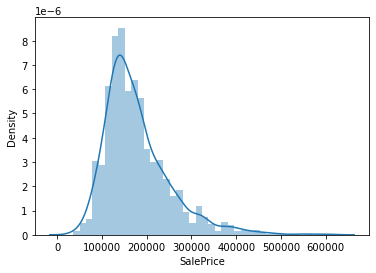

In [54]:
# Distribution plot for the target variable 'SalePrice'

sns.distplot(house_pricing_df['SalePrice'])
plt.show()

#### Inference - The response variable is normally distributed with a mild skew on the right side.

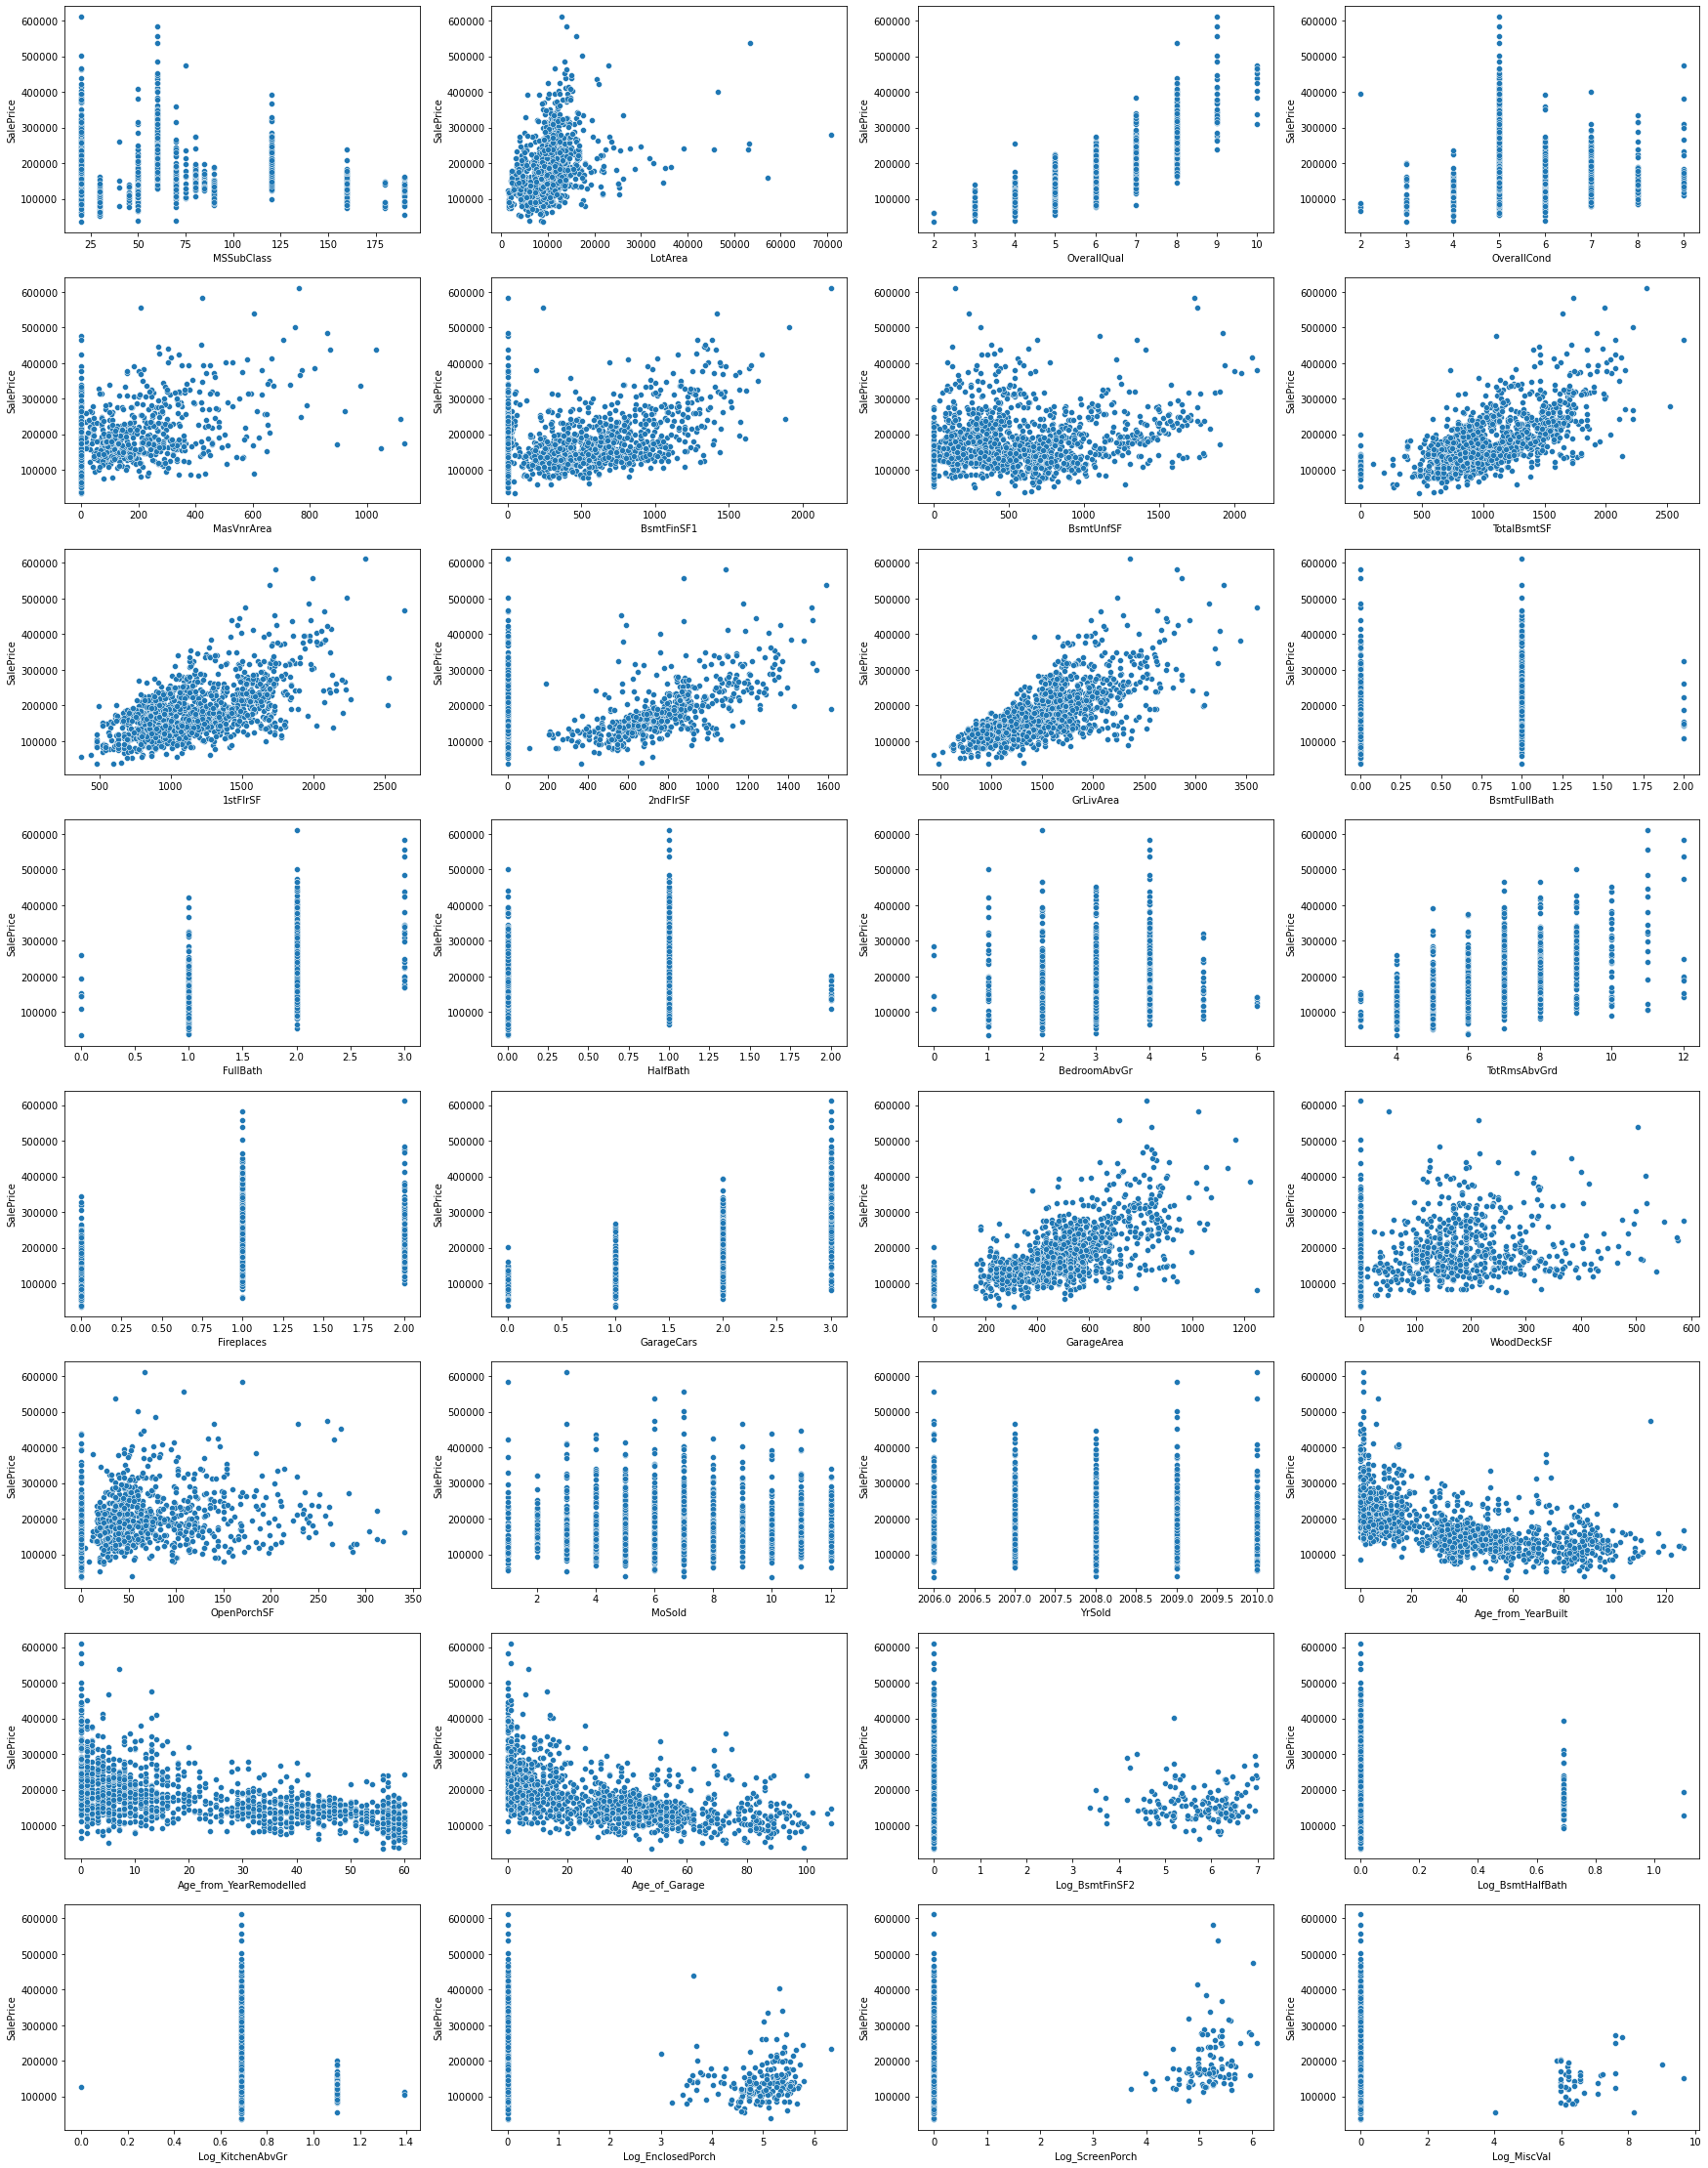

In [55]:
# Scatter plots to learn the relationship between each numerical variable and the response variable 'SalePrice'

plt.figure(figsize=(30,40))
j=0
for i in (house_pricing_df.select_dtypes(include=['float','int'])).columns:
    if (i != 'SalePrice'):
        plt.subplot(8, 4, j + 1)
        sns.scatterplot(data = house_pricing_df, x=i, y='SalePrice')
        j=j+1
plt.show()

#### Inferences : 
- The variables __'OverallQual', 'BsmtFinSF1', 'BsmtUnfSF' 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF' and 'OpenPorchSF'__ are __positively__ correlated with the target variable __'SalePrice'__.

- The variables __'Age_from_YearBuilt', 'Age_of_Garage' and 'Age_from_YearRemodelled'__ are __negatively__ correlated with the target variable __'SalePrice'__.

- The scatterplots of variables __'MasVnrArea' and 'LotArea'__ with the target variable has more points densed towards the left bottom.

- Since most of the data contains '0', __no specific patterns or relationship__ is observed between __log transformed variables__ and the __target variable__. 

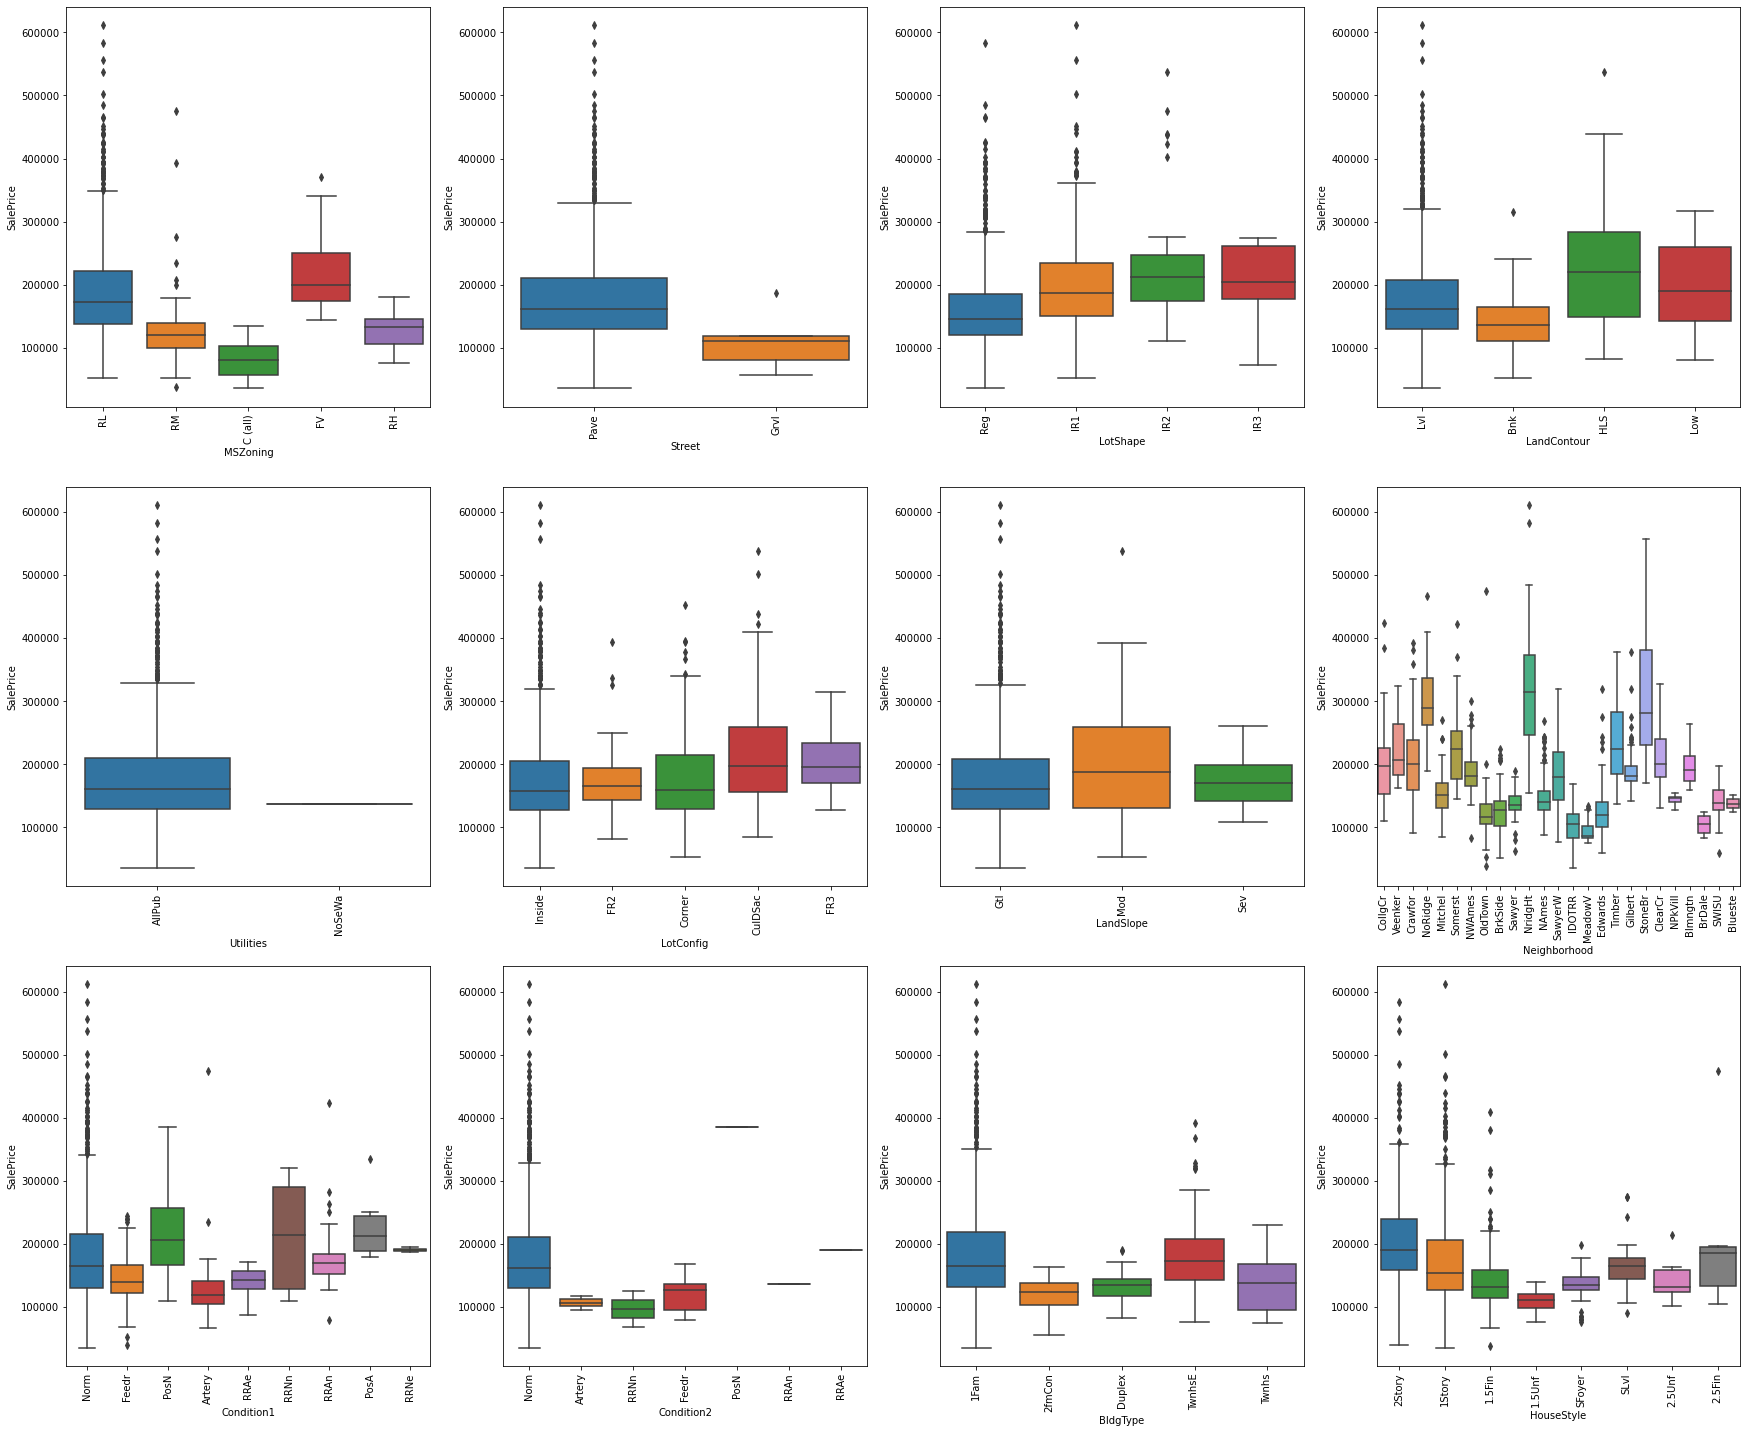

In [56]:
# Analysing first 12 categorical variables of the dataset with the response variable 'SalePrice' using boxplots 

plt.figure(figsize=(30,25))
cat_var_list1 = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities','LotConfig', 'LandSlope', 
                 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle']
j=0
for i in cat_var_list1:
        plt.subplot(3, 4, j + 1)
        sns.boxplot(x=house_pricing_df[i], y='SalePrice', data = house_pricing_df)
        j=j+1
        plt.xticks(rotation=90)
plt.show()

#### Inferences : 
- If the road access to property is __Paved__, the SalePrice is higher compared to __Gravel__.
- Sale prices are higher for __Floating village residential__ and __Commercial zones__.
- When the lot shape is moderately irregular __(IR2)__, the price of house is relatively higher.
- __Hillside contours__ (significant slope from side to side) have higher Saleprices compared to other land contours.
- When all the __public utilities__ like Electricity, Gas, Water and Sewage are available, obviously the price of house is high.
- If the house is located in __severe slope__, its price is relatively lower.
- Houses near the __North Ridge Heights__ are costlier compared to other neighbourhoods.
- Houses that are built for __1-family dwelling__ but later on converted to __2-family__ are observed to be cheaper. 
- __2 story__ houses are sold at relatively higher prices while one and half story with 2nd level unfinished houses are cheaper.

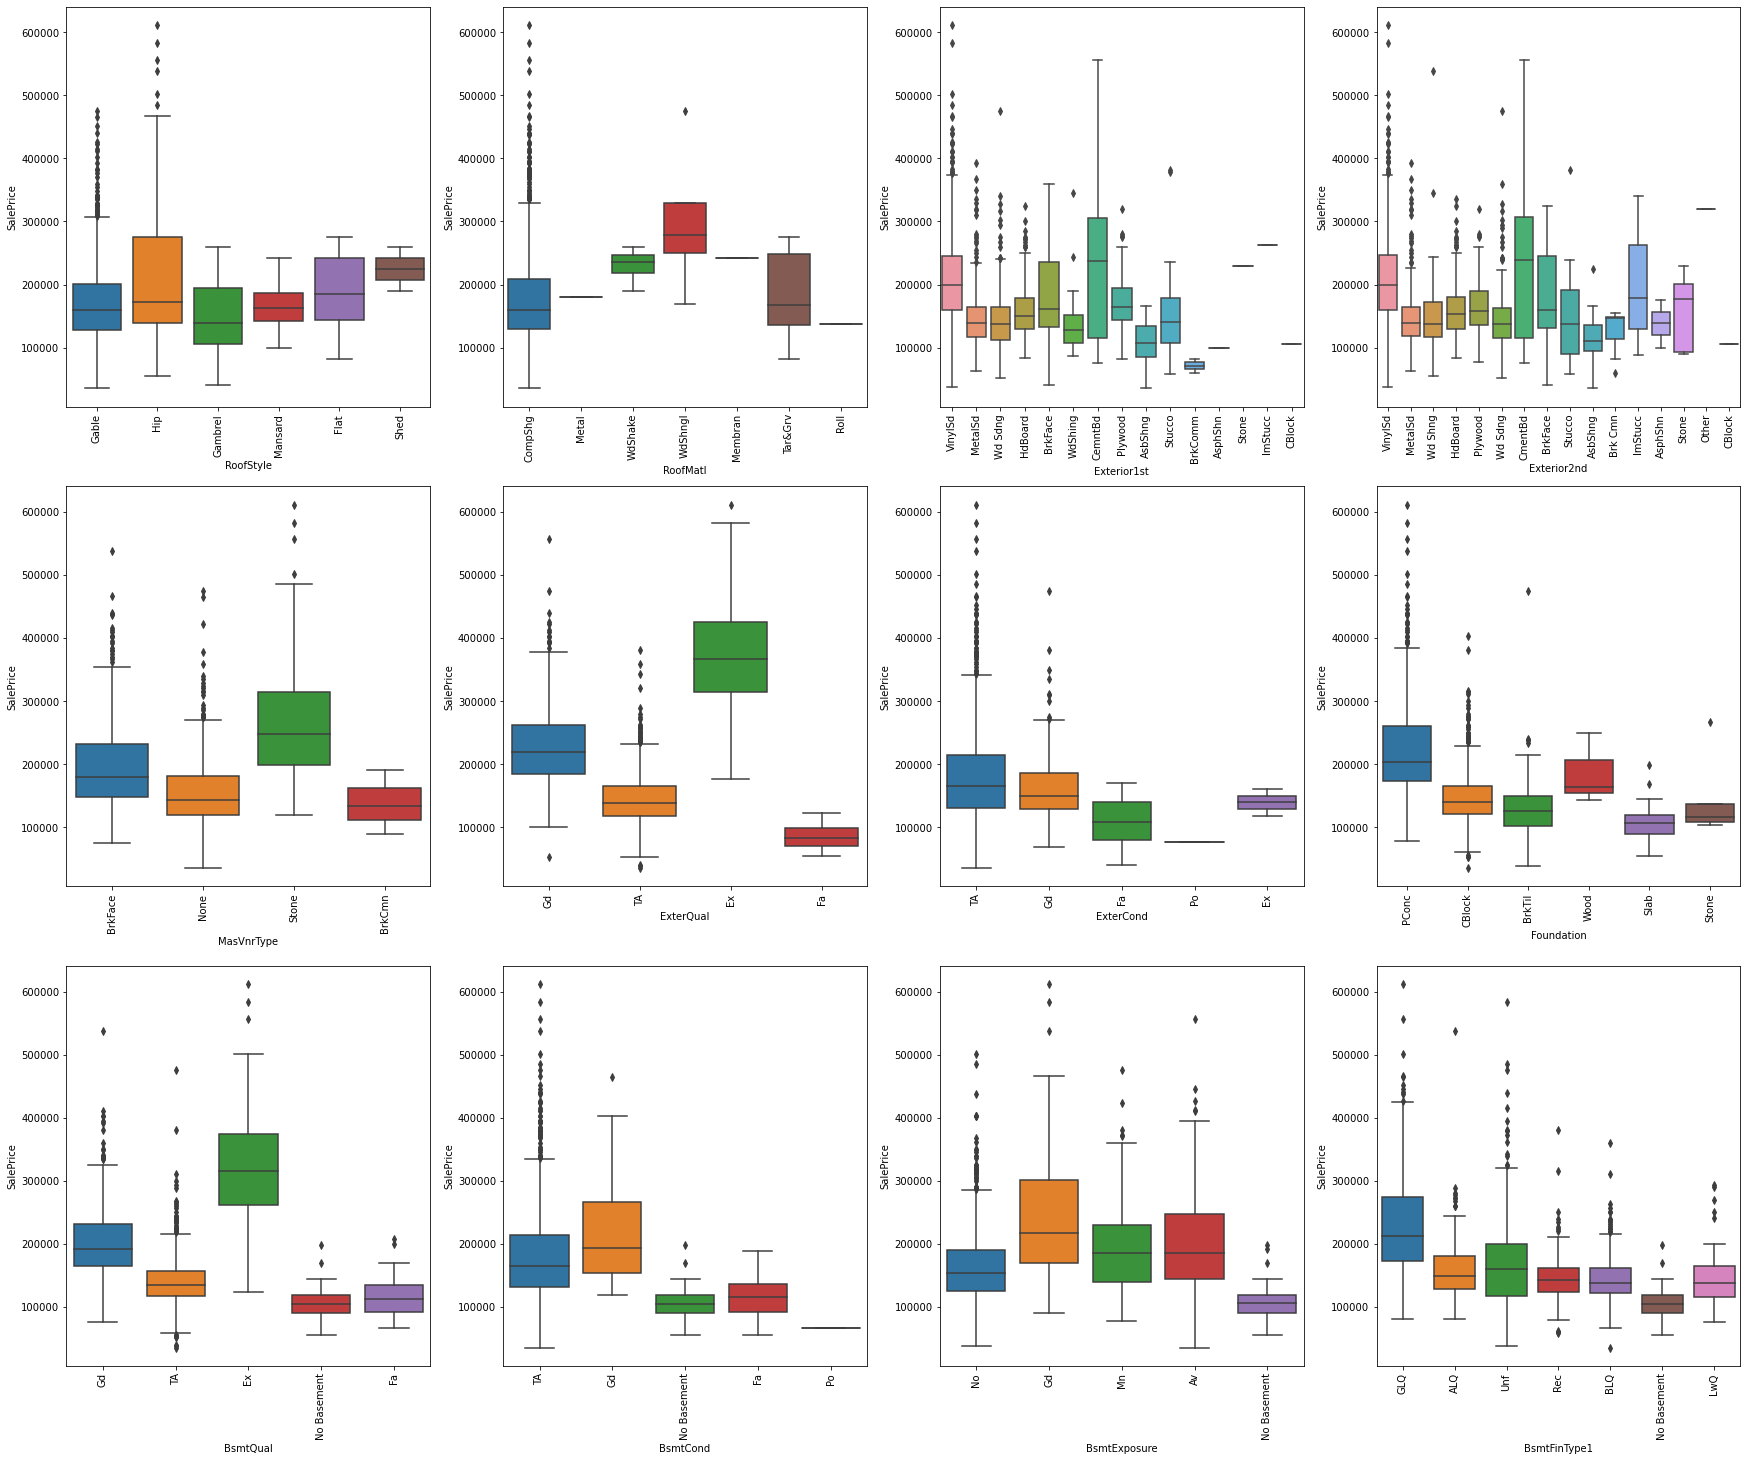

In [57]:
# Analysing next 12 categorical variables of the dataset with the response variable 'SalePrice' using boxplots 

plt.figure(figsize=(30,25))
cat_var_list2 = ['RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
                 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1']
j=0
for i in cat_var_list2:
        plt.subplot(3, 4, j + 1)
        sns.boxplot(x=house_pricing_df[i], y='SalePrice', data = house_pricing_df)
        j=j+1
        plt.xticks(rotation=90)
plt.show()

#### Inferences :
- If the roof is made of __shed__, Saleprice is higher compared to other roof styles.
- Houses that are made of __wooden shingles and wooden shakes__ cost more than other roofing materials.
- Exterior coverings made of __cement board__ increases the SalePrice and on the other hand __Asbestos shingles__ seem to decrease the SalePrice of house.
- For the masonry veneer made of __stone__ with the __excellent__ external quality, the houses are sold at higher prices.
- When the __external condition__ is __typical/average__, the Saleprice of house is high and also if __poured concrete foundation__ is used, the prices also hike.

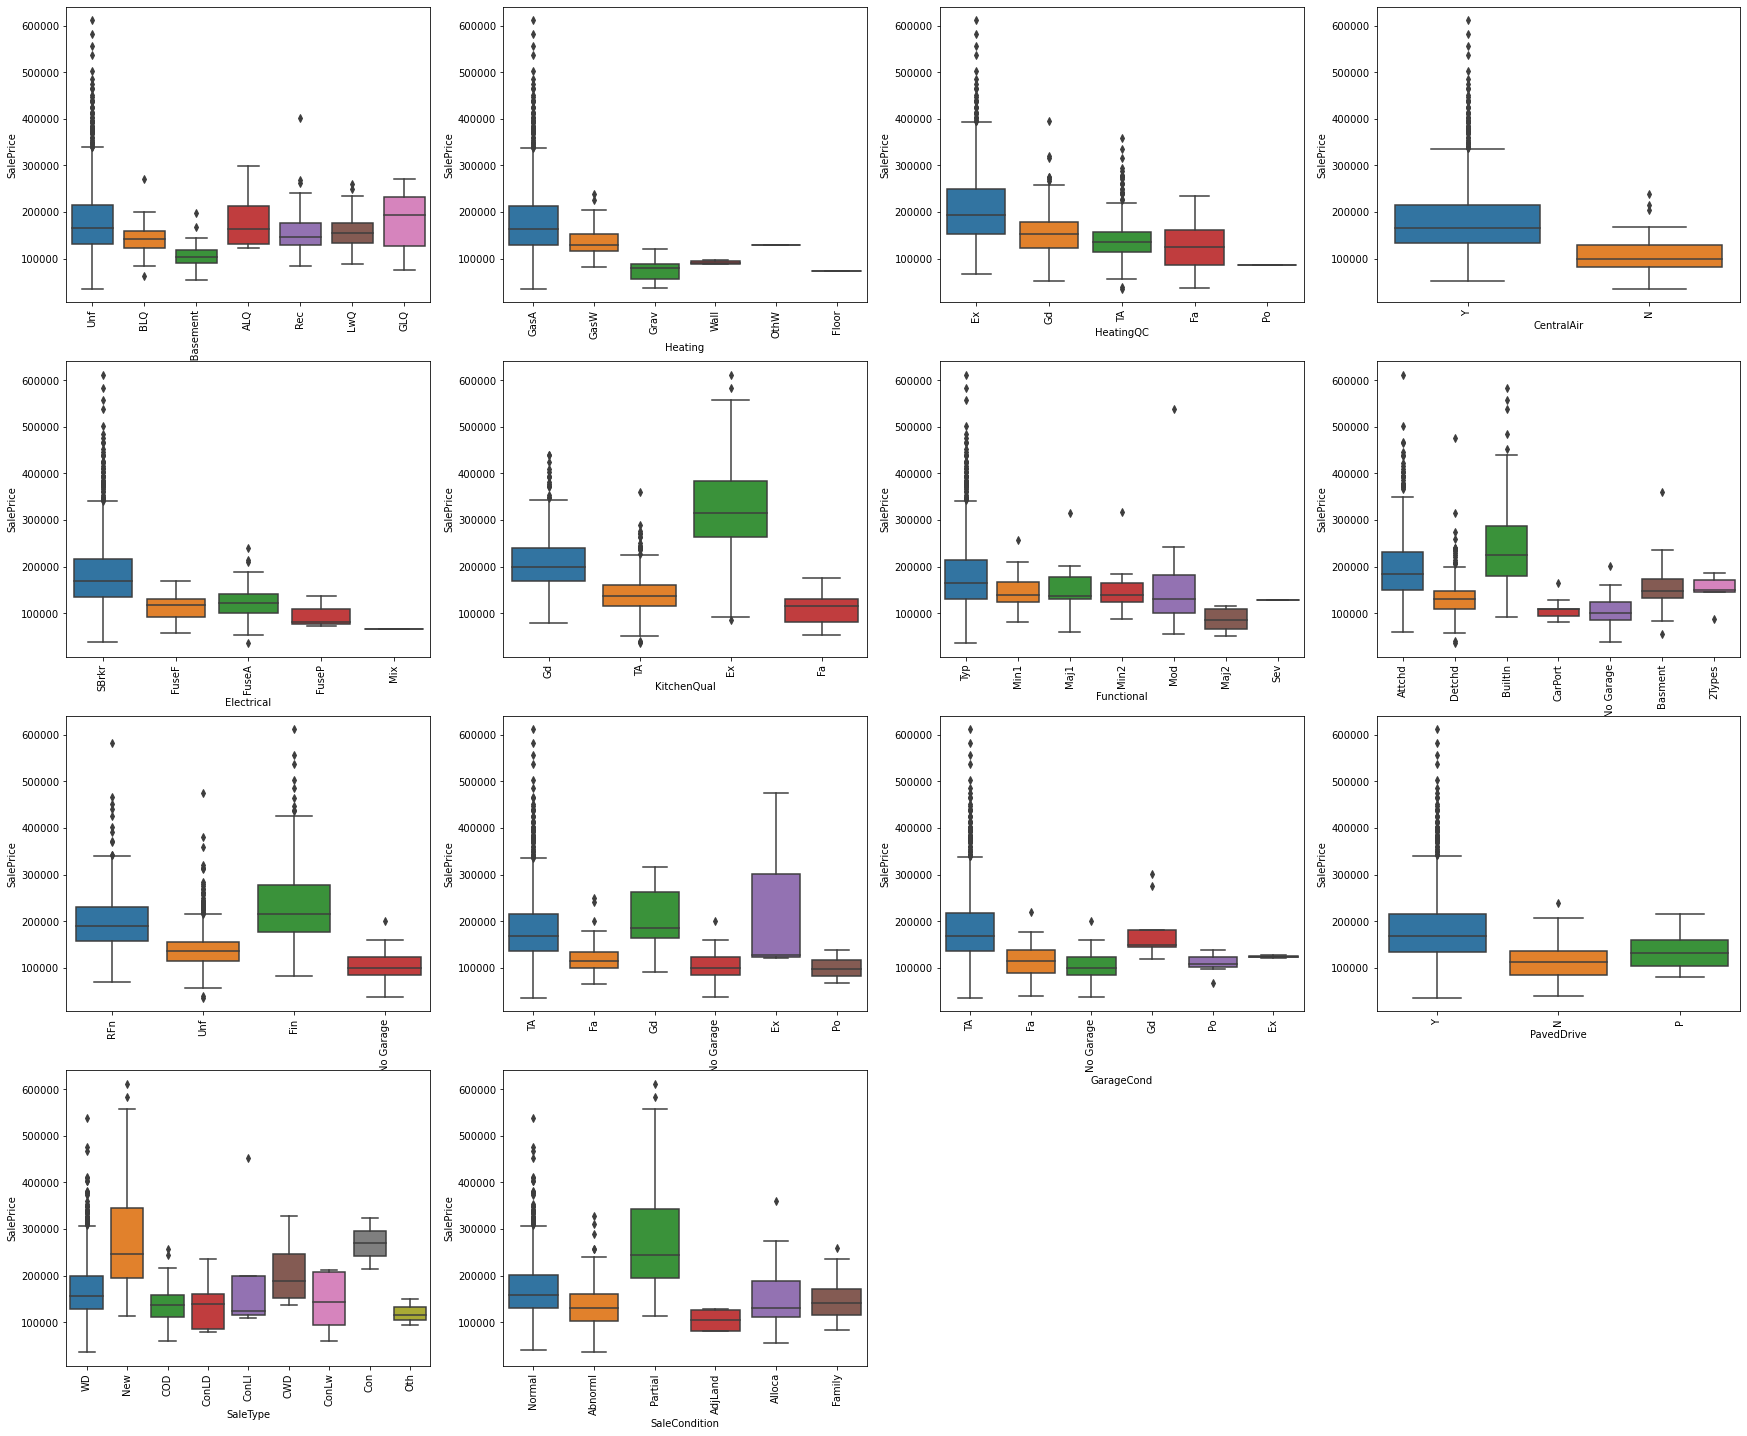

In [58]:
# Analysing the next 14 categorical variables of the dataset with the response variable 'SalePrice' using boxplots 

plt.figure(figsize=(30,25))
cat_var_list3 = ['BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
                 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']
j=0
for i in cat_var_list3:
        plt.subplot(4, 4, j + 1)
        sns.boxplot(x=house_pricing_df[i], y='SalePrice', data = house_pricing_df)
        j=j+1
        plt.xticks(rotation=90)
plt.show()

#### Inferences : 
- With __excellent basement conditions and quality__, the price of the property increases. 
- Also based on __excellent heating conditions, electrical system and availability of central air conditions__, the variations in Saleprice is observed.
- Based on __Garage conditions__, the house price varies and it also depends on the __Kitchen Quality and functionality__ of the house.
- If there is a __paved driveway__ for a house, the SalePrice is higher.
- SalePrice for __New houses__ are usually high and the houses which offers __15% Down Payment for contract with regular term payments__ are costlier than the other Sale-conditions.


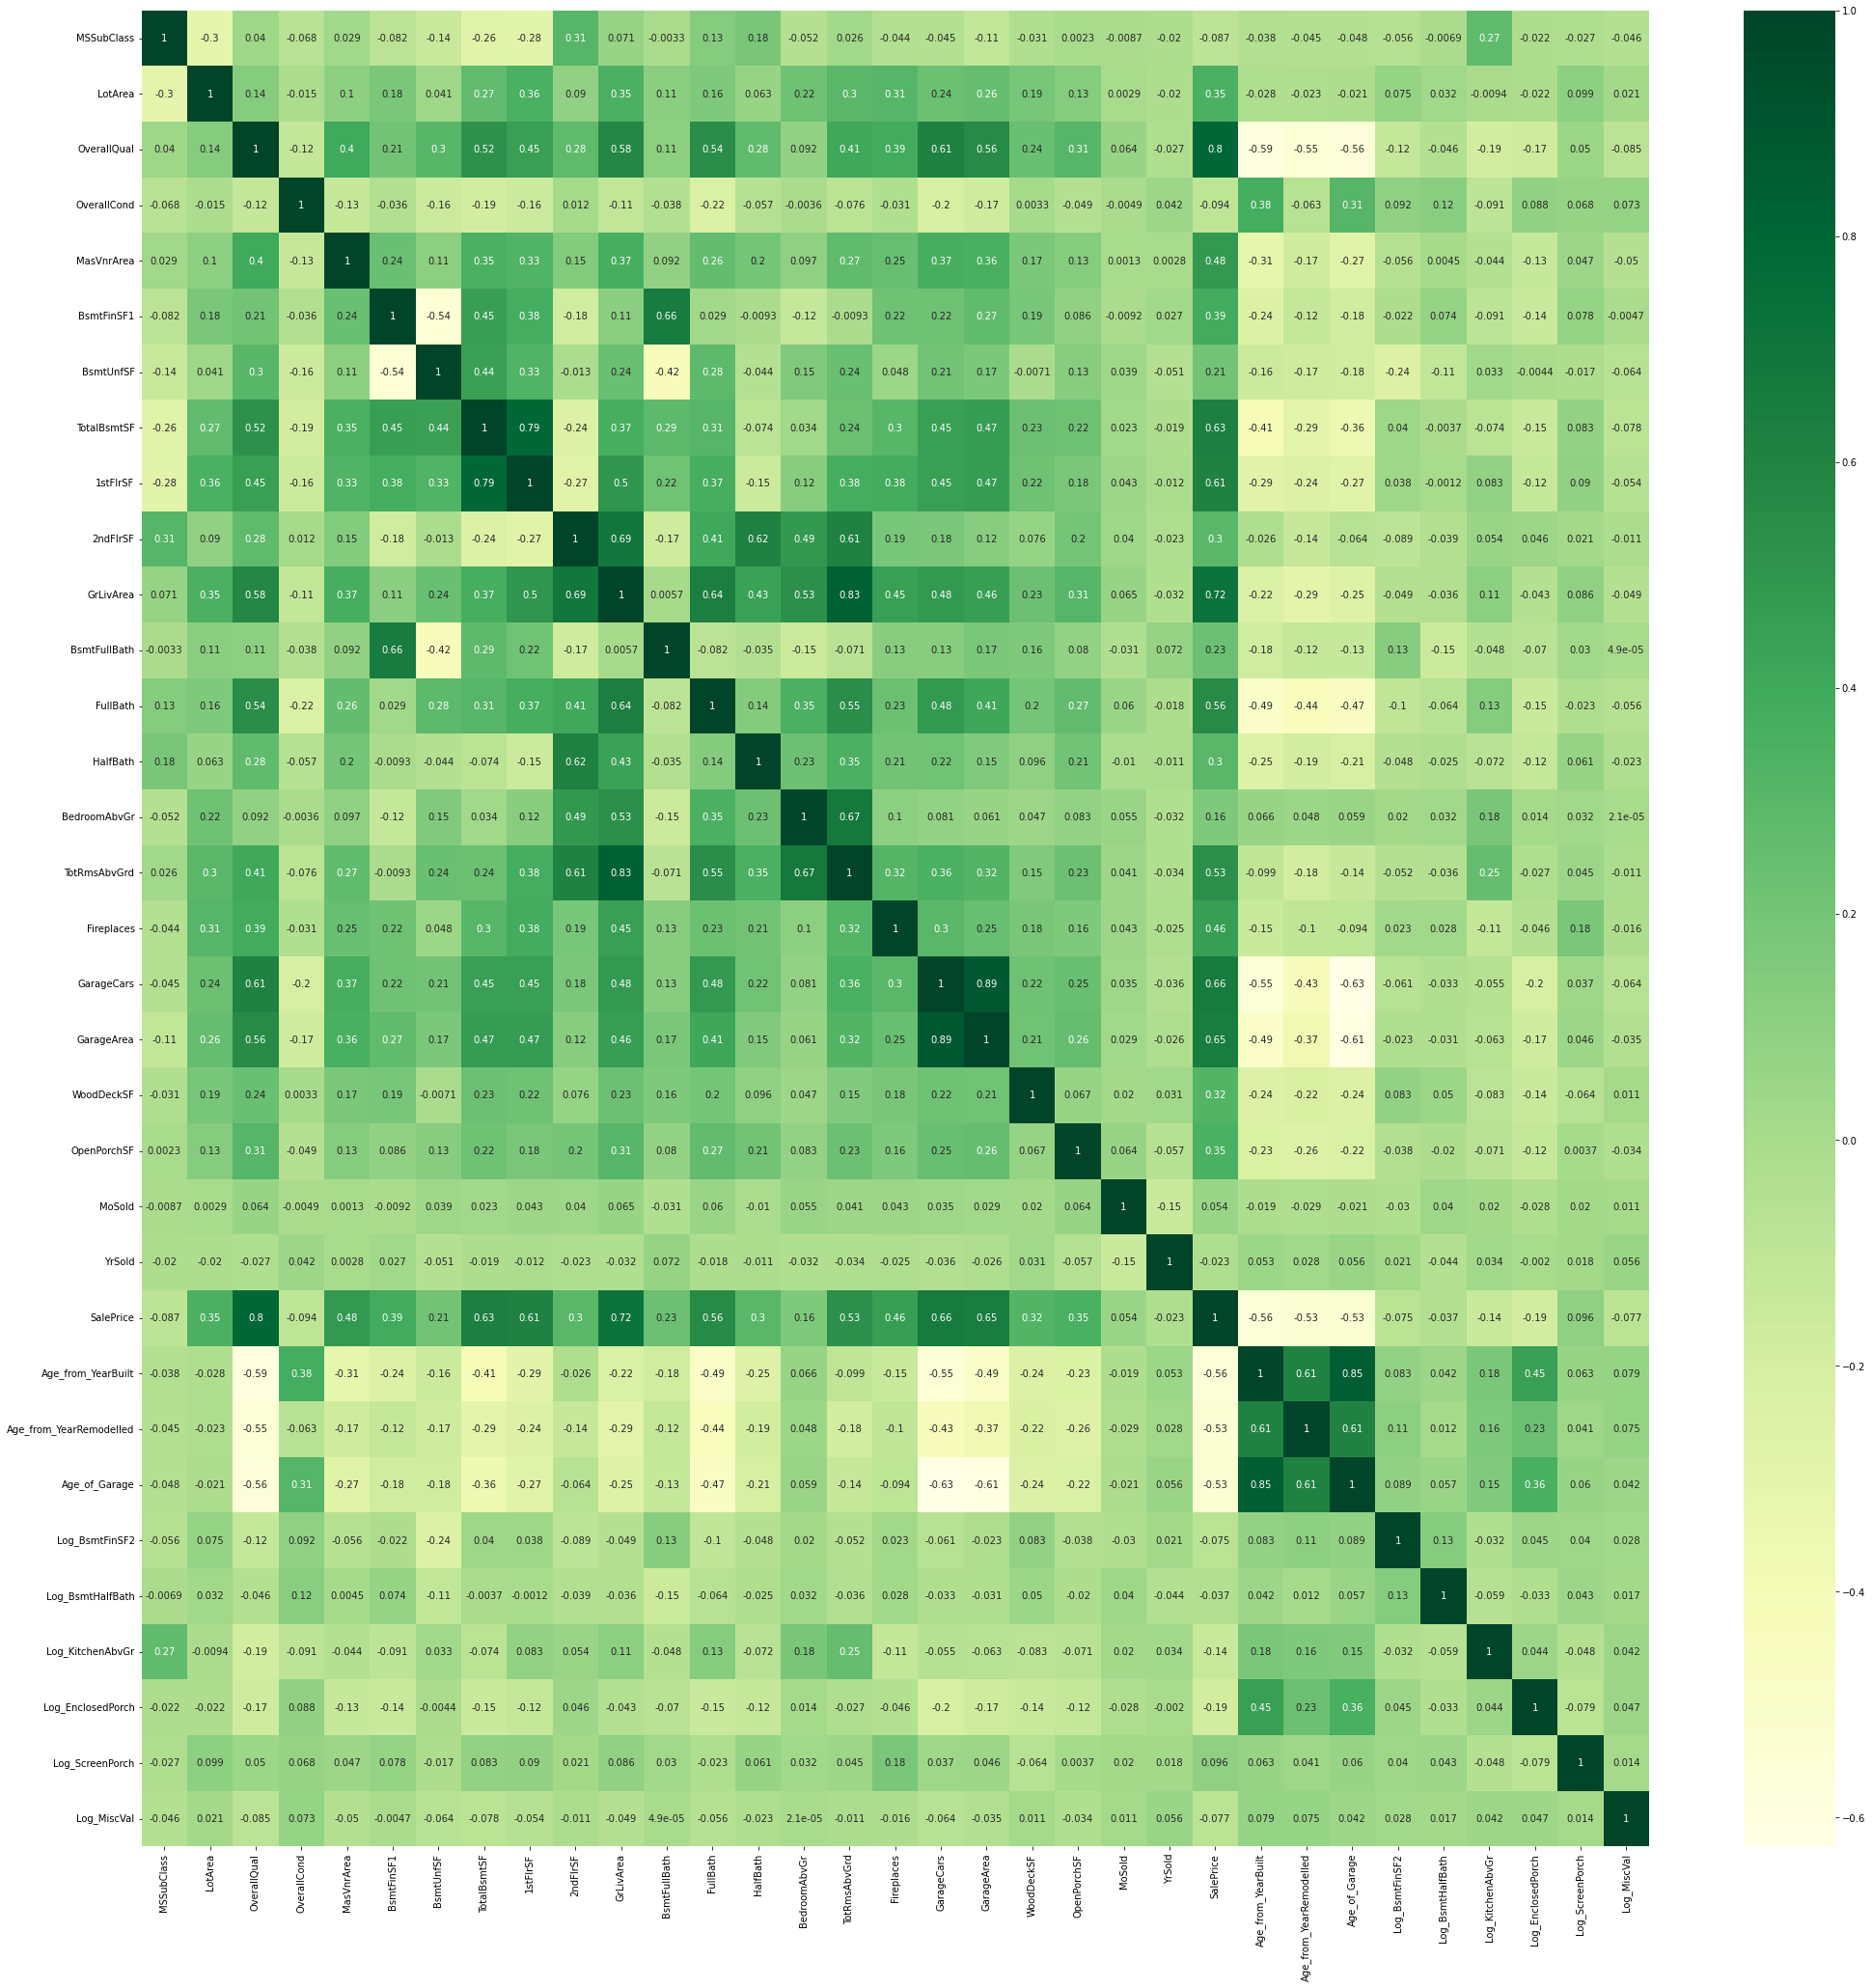

In [59]:
# Analysing the correlation of numeric variables in house_pricing_df

plt.figure(figsize = (35,35))
sns.heatmap(house_pricing_df.corr(), annot = True, cmap = "YlGn")
plt.show()

#### Inferences :
- Many variables are correlated with the response variable __'SalePrice'__.
- Excluding the response variable, some other variables also seem to have high correlation with each other. Such variables cause __Multicollinearity__ issue while building a model. To resolve this, let us analyse the heatmap and remove the redundant variables.
- __'GarageArea'__ and __'GarageCars'__ are highly correlated __(0.89)__, also __'Age_of_Garage'__ and __'Age_from_YearBuilt'__ are highly correlated __(0.85)__.
- __'TotRmsAbvGrd'__ and __'GrLivArea'__ are highly correlated __(0.83)__. Similarly __'TotalBsmtSF'__ and __'1stFlrSF'__ are also correlated __(0.79)__.

In [60]:
# Dropping the highly correlated variables to resolve redundancy

house_pricing_df = house_pricing_df.drop(['GarageArea','1stFlrSF','Age_of_Garage','TotRmsAbvGrd'], axis = 1)

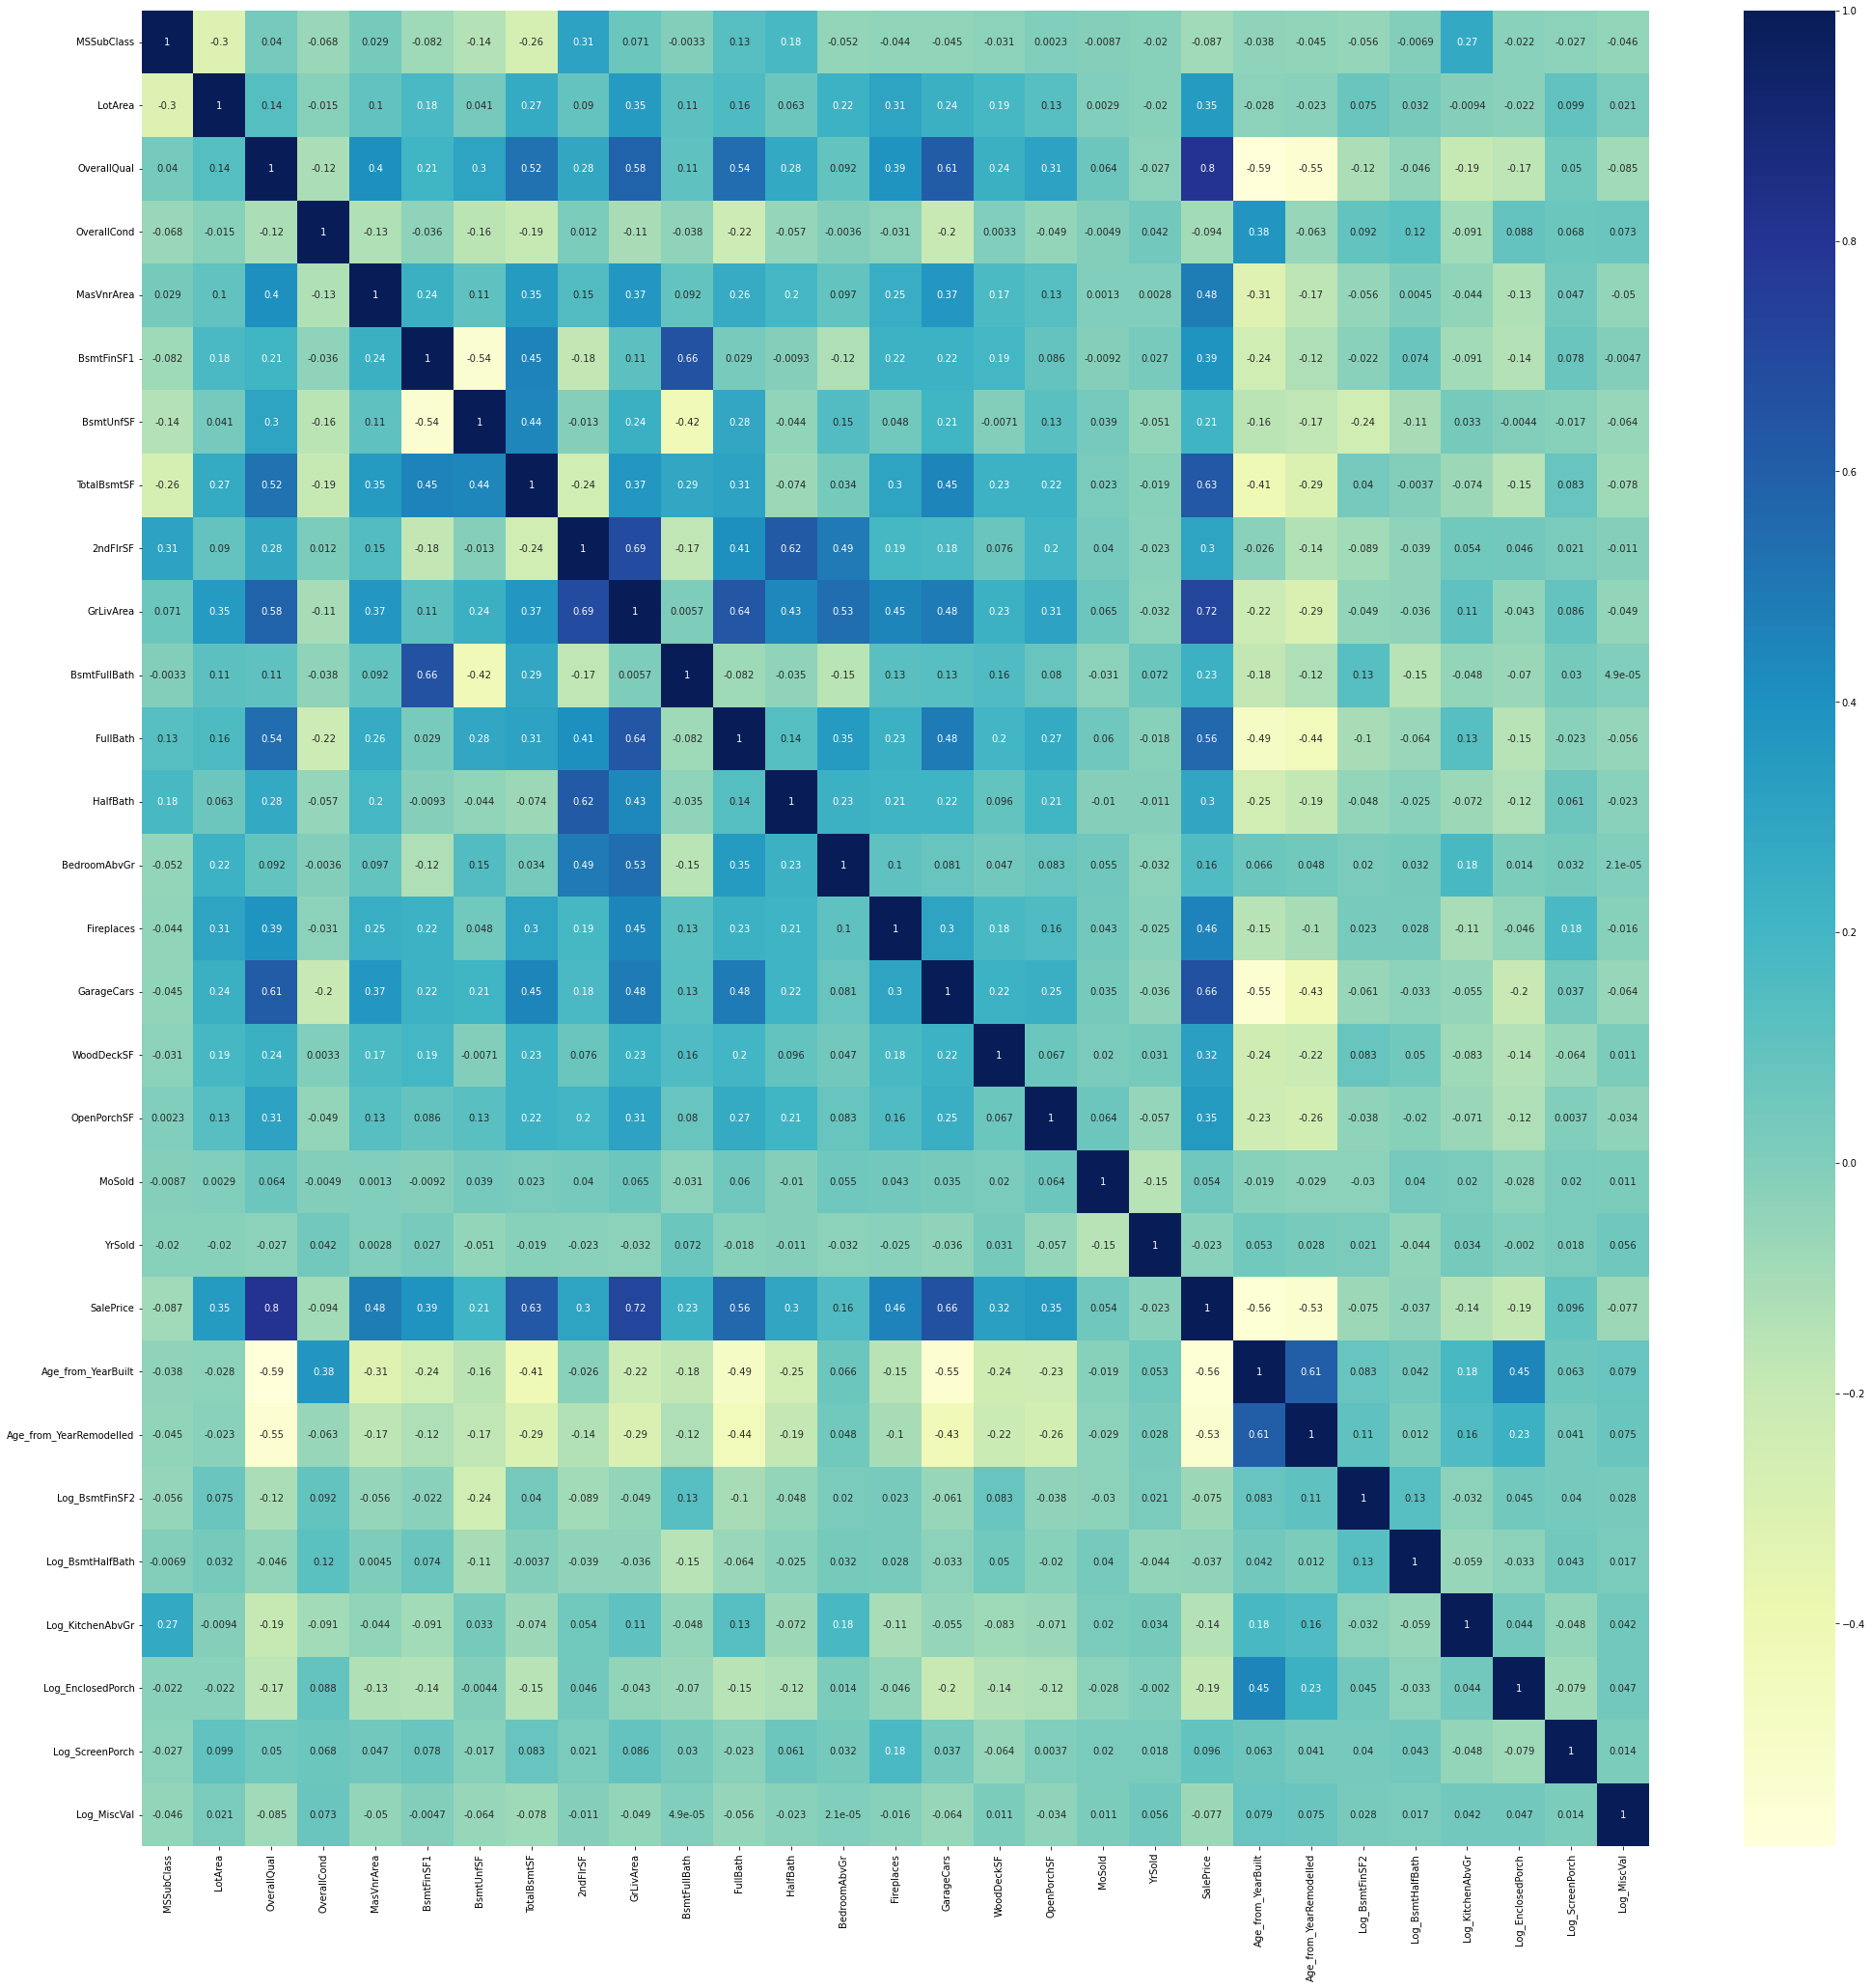

In [61]:
# Analysing the correlation of numeric variables in house_pricing_df after dropping redundant variables

plt.figure(figsize = (35,35))
sns.heatmap(house_pricing_df.corr(), annot = True, cmap = "YlGnBu")
plt.show()

#### Inference :
- After removing the redundant variables (excluding target variable), the data is now ready for model building.

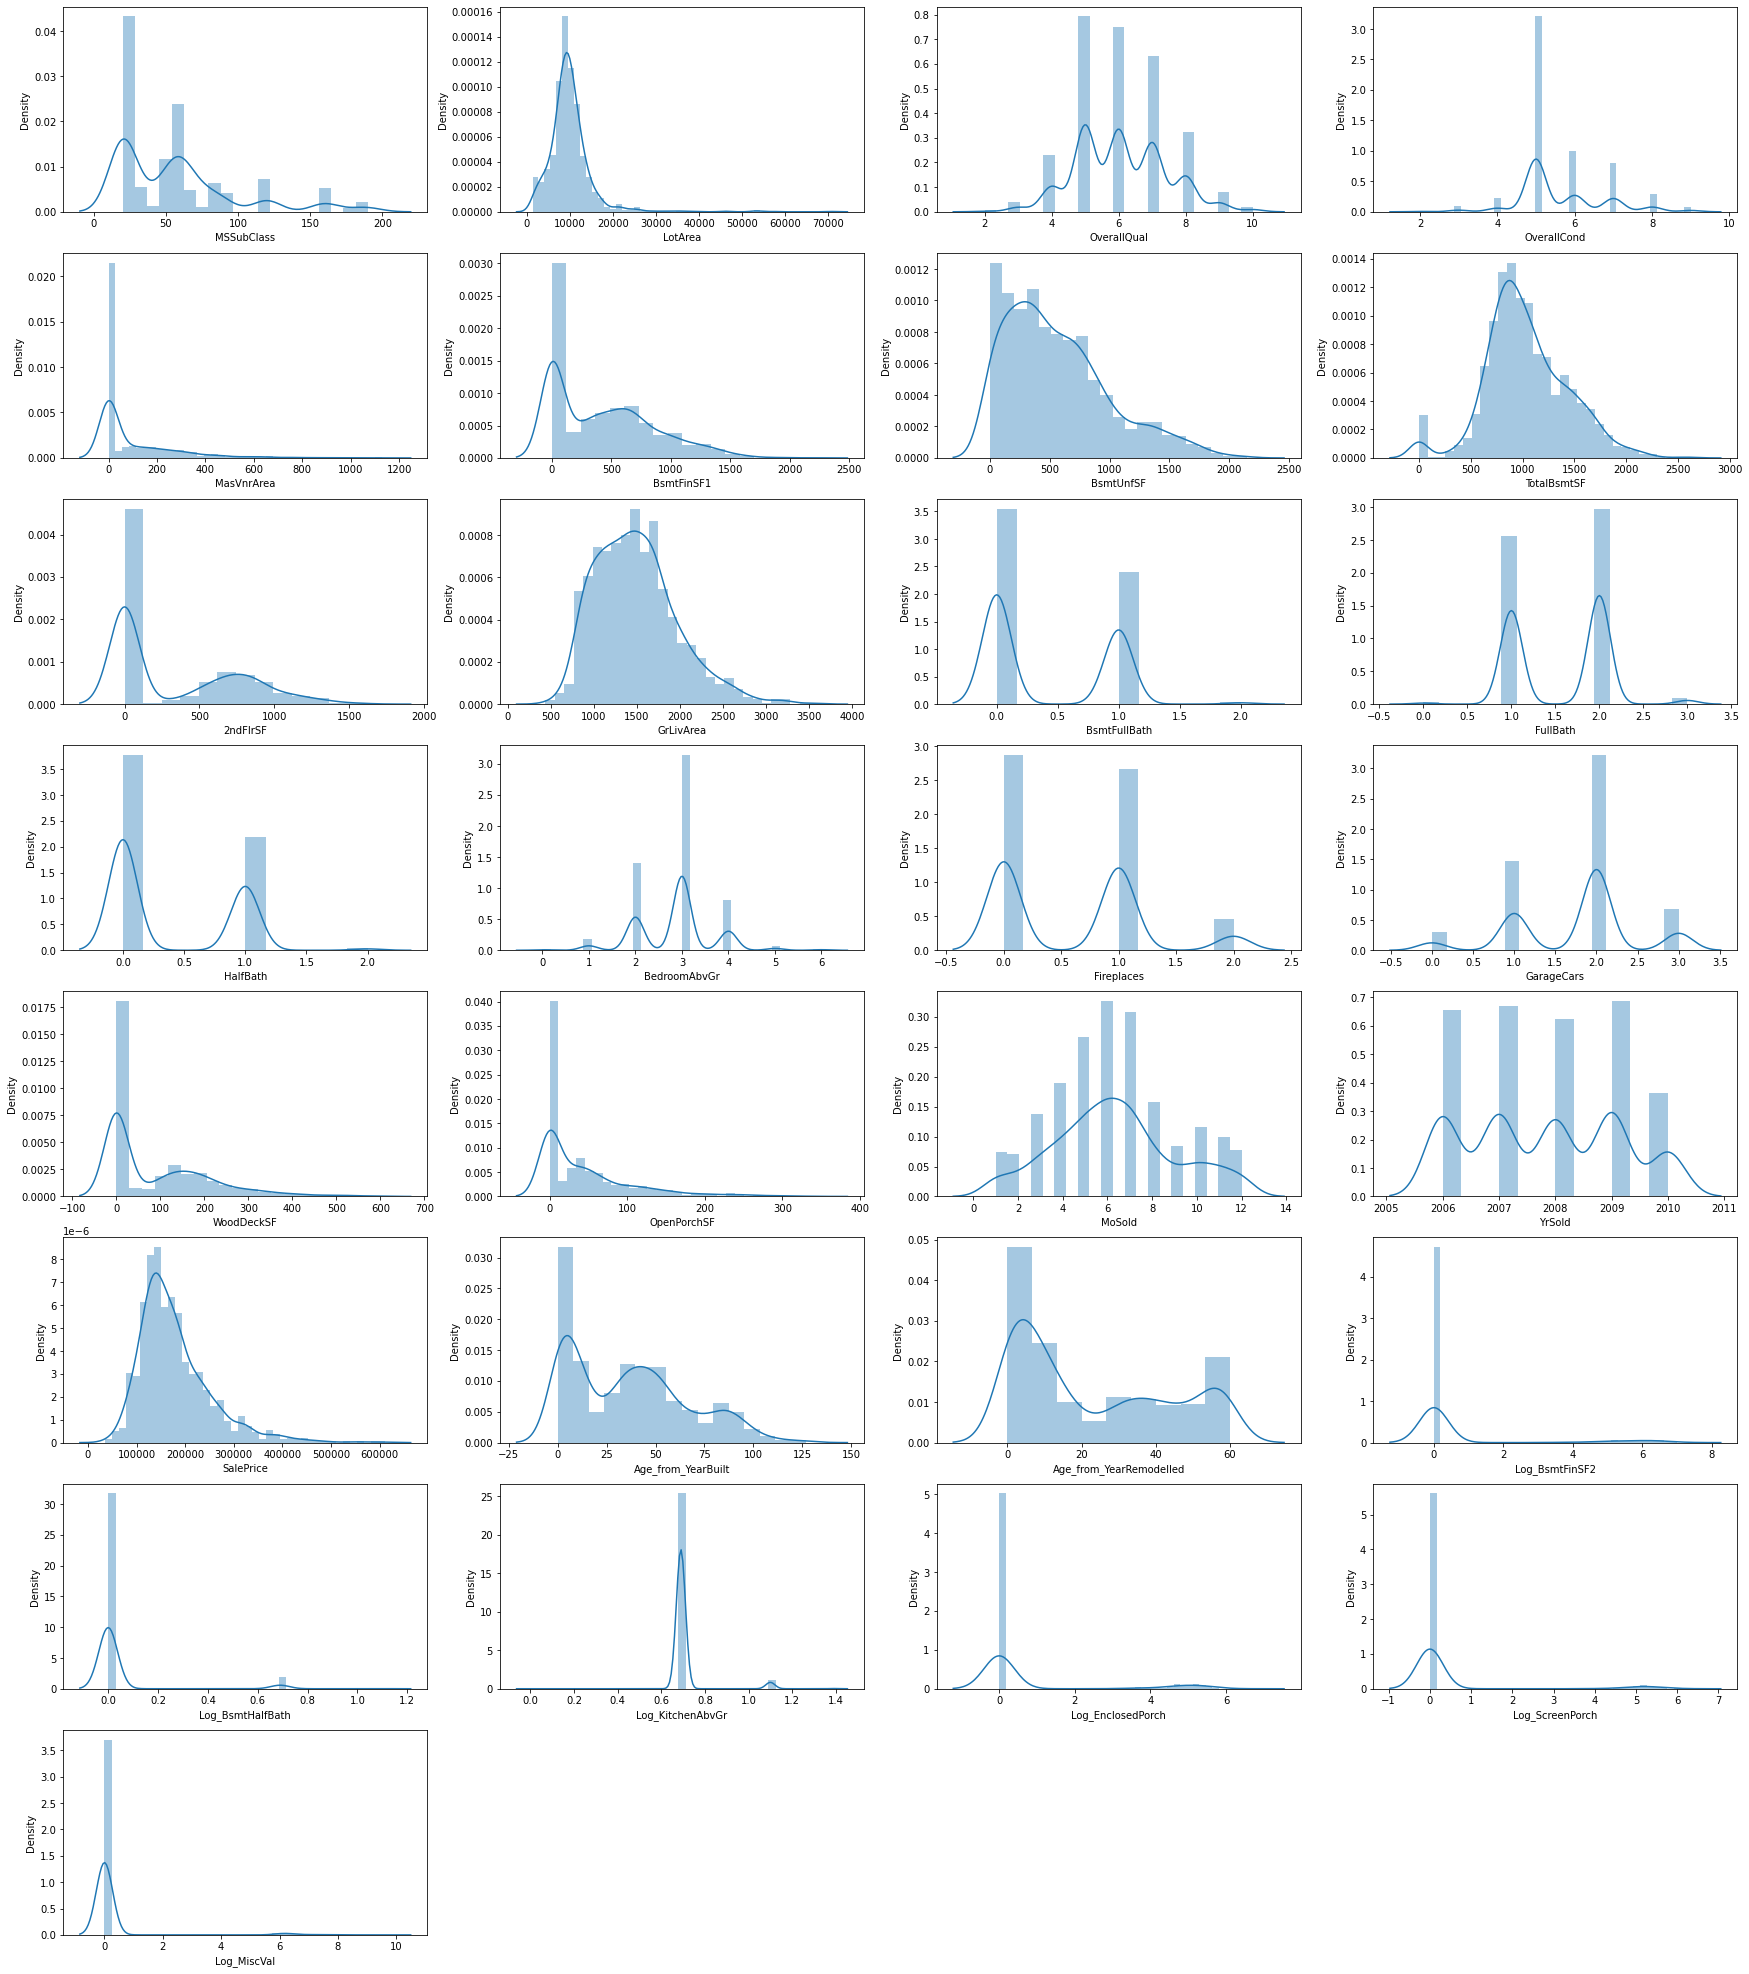

In [62]:
# Analysing the distribution of each numerical variable in the dataset

plt.figure(figsize=(30,40))
j=0
for i in (house_pricing_df.select_dtypes(include=['float','int'])).columns:
    plt.subplot(9, 4, j + 1)
    sns.distplot(house_pricing_df[i])
    j=j+1
plt.show()

#### Inference - Some variables follow normal distribution while others are kind of wavy.

In [63]:
# Shape of the dataframe after removing redundant variables

house_pricing_df.shape

(1415, 67)

## 4. MODEL BUILDING

From the __visualization__ of data, it is evident that some of the features have __linear relationship__ with the __target variable 'SalePrice'__. <br>Let us build a __Multiple Linear Regression model__ to __predict the SalePrice of the house__.

### a. Data Preparation 

In [64]:
# Subset all categorical variables to create dummies

categorical_var_list = house_pricing_df.select_dtypes(include=['object'])
categorical_var_list.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [65]:
# Convert categorical variables to dummies 

categorical_dummies = pd.get_dummies(categorical_var_list, drop_first=True)
categorical_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_No Garage,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_No Garage,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0

In [66]:
# Drop categorical variables as we have dummies now

house_pricing_df = house_pricing_df.drop(list(categorical_var_list.columns), axis=1)

In [67]:
# Concat dummy variables with the dataset

house_pricing_df = pd.concat([house_pricing_df, categorical_dummies], axis=1)

In [68]:
# Shape of the dataframe after creating dummies

house_pricing_df.shape

(1415, 232)

In [69]:
# First 5 records of the dataframe

house_pricing_df.head()

,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice,Age_from_YearBuilt,Age_from_YearRemodelled,Log_BsmtFinSF2,Log_BsmtHalfBath,Log_KitchenAbvGr,Log_EnclosedPorch,Log_ScreenPorch,Log_MiscVal,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_No Garage,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_No Garage,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,7,5,196,706,150,856,854,1710,1,2,1,3,0,2,0,61,2,2008,208500,5,5,0.0,0.00,0.69,0.00,0.0,0.0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0

In [70]:
# Split into X and y

y = house_pricing_df.pop("SalePrice") # response variable in Y

X = house_pricing_df # predictors in variable X

In [71]:
X.shape

(1415, 231)

In [72]:
# Scaling the features necessary 
# Storing column names in cols

cols = X.columns
X = pd.DataFrame(scale(X))
y = scale(y)
X.columns = cols
# X.columns

In [73]:
X.head()

,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,MoSold,YrSold,Age_from_YearBuilt,Age_from_YearRemodelled,Log_BsmtFinSF2,Log_BsmtHalfBath,Log_KitchenAbvGr,Log_EnclosedPorch,Log_ScreenPorch,Log_MiscVal,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_No Garage,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_No Garage,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.075608,-0.283738,0.693584,-0.527187,0.570146,0.646773,-0.950580,-0.459925,1.215489,0.460968,1.152871,0.822413,1.240277,0.180290,-0.952755,0.336452,-0.770114,0.268175,-1.598526,0.142228,-1.050173,-0.8709

In [74]:
# Split into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=100)

### b. Linear Regression

#### Let us first build a basic linear regression model using statsmodels with all features in the dataset.

### Assumptions of a linear regression model

Before building the model, let us assume that

1. __Linear relationship__ exists between X and Y
2. Error terms are __normally__ distributed
3. Error terms are __independent__ to each other
4. Error terms have __constant variance (homoscedasticity)__

In [75]:
# Linear regression model with all 231 features

X_train_new = sm.add_constant(X_train, has_constant='add')   # Add constant
linreg_model = sm.OLS(y_train, X_train_new).fit()            # Fit the line using statsmodels

# Model prediction

y_pred_train = linreg_model.predict(X_train_new)             # Predict the y-values of train data        
X_test_new = sm.add_constant(X_test,has_constant='add')      # Add constant
y_pred_test = linreg_model.predict(X_test_new)               # Predict the y-values of test data
# print(linreg_model.params)

In [76]:
# R squared values of actual vs predicted values of train set and test set with 231 (all) features in the dataset

print("R - squared value for train set (231 features - Linear regression) : ",r2_score(y_train,y_pred_train))
print("R - squared value for test set (231 features - Linear regression) : ",r2_score(y_test,y_pred_test))

# RSS for linear regression of train vs test sets with all 231 features 

print("\nRSS for train set (231 features - Linear regression) : ",np.sum(np.square(y_train - y_pred_train)))
print("RSS for test set (231 features - Linear regression) : ",np.sum(np.square(y_test - y_pred_test)))

# Mean Squared Error for linear regression of train vs test sets with all 231 features

print("\nMSE for train set (231 features - Linear regression) : ",mean_squared_error(y_train, y_pred_train))
print("MSE for test set (231 features - Linear regression) : ",mean_squared_error(y_test, y_pred_test))

# Root Mean Squared Error for linear regression of train vs test sets with all 231 features

print("\nRMSE for train set (231 features - Linear regression) : ",(mean_squared_error(y_train, y_pred_train))**0.5)
print("RMSE for test set (231 features - Linear regression) : ",(mean_squared_error(y_test, y_pred_test))**0.5)


R - squared value for train set (231 features - Linear regression) :  0.9417885138634335
R - squared value for test set (231 features - Linear regression) :  0.8943979958093096

RSS for train set (231 features - Linear regression) :  56.45491930414185
RSS for test set (231 features - Linear regression) :  46.945411070199754

MSE for train set (231 features - Linear regression) :  0.0570251710142847
MSE for test set (231 features - Linear regression) :  0.11045979075341118

RMSE for train set (231 features - Linear regression) :  0.23879943679641435
RMSE for test set (231 features - Linear regression) :  0.3323549168485569


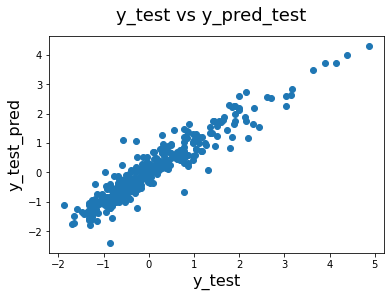

In [79]:
# Plotting y_test and y_test_pred (Linear regression with 231 features)

fig = plt.figure()
plt.scatter(y_test, y_pred_test)
fig.suptitle('y_test vs y_pred_test', fontsize = 18)              
plt.xlabel('y_test', fontsize = 16)                          
plt.ylabel('y_test_pred', fontsize = 16) 
plt.show()

#### Inference - The actual vs predicted values of test data shows low bias.

In [80]:
# Function to build Linear regression model using RFE with 'n' features to be selected

def linear_regression(n):
    
    lm = LinearRegression()                                      # Instantiate LinearRegression object
    lm.fit(X_train, y_train)                                     # Fit a line
    rfe = RFE(lm,n)                                              # RFE to select 'n' number of features
    rfe = rfe.fit(X_train, y_train)                              # Fit train data to RFE
    col = X_train.columns[rfe.support_]                          # RFE selected features/columns
    X_train_new = X_train[col]                                   # Use RFE selected features to build model in statsmodels
    X_train_new = sm.add_constant(X_train_new,has_constant='add')# Add constant
    lr = sm.OLS(y_train, X_train_new).fit()                      # Fit the line using statsmodels
    
    # Model prediction
    
    y_pred_train = lr.predict(X_train_new)                       # Predict the y-values of train data
    X_test_new = X_test[col]                                     # Use the RFE selected features to predict the test data
    X_test_new = sm.add_constant(X_test_new,has_constant='add')  # Add constant
    y_pred_test = lr.predict(X_test_new)                         # Predict the y-values of test data

    metric = []                                                  # List to store the metric values
    
    r2_train_lr = r2_score(y_train, y_pred_train)                # R2 score of train data
    metric.append(r2_train_lr)                                   # Append the result to metric list
    r2_test_lr = r2_score(y_test, y_pred_test)                   # R2 score of test data
    metric.append(r2_test_lr)                                    # Append the result to metric list

    rss1_lr = np.sum(np.square(y_train - y_pred_train))          # RSS (Residual Sum of Squares) of train data
    metric.append(rss1_lr)                                       # Append the result to metric list
    rss2_lr = np.sum(np.square(y_test - y_pred_test))            # RSS (Residual Sum of Squares) of test data
    metric.append(rss2_lr)                                       # Append the result to metric list

    mse_train_lr = mean_squared_error(y_train, y_pred_train)     # Mean Squared Error of train data
    metric.append(mse_train_lr**0.5)                             # Append the result to metric list
    mse_test_lr = mean_squared_error(y_test, y_pred_test)        # Mean Squared Error of test data
    metric.append(mse_test_lr**0.5)                              # Append the result to metric list

    return metric                                                # Return metric list

__Now let us build linear models by selecting various number of features using RFE and compare their metrics. <br>
This is done to realise how complexity and variance increases with increase in number of features.__

In [81]:
# Number of features to be selected by RFE

rfe_feature_count = [3, 5, 7, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 150, 200] 

# Resultant metrics are stored in array named 'metric'
metric = []
for i in rfe_feature_count:
#   print("\nMetrics obtained in Linear Regression using RFE for feature count : ", i)
    met = linear_regression(i)
#   print(met)
    metric.append(met)   

In [82]:
# Convert to Dataframe
lin_reg_metrics_df = pd.DataFrame(metric, columns = ['R2-Score (train)', 'R2-Score (test)','RSS (train)', 'RSS (test)',
                                                     'Mean squared error (train)', 'Mean squared error (test)'])

# Add feature count to this dataframe
rfe_feature_count_series = pd.Series(rfe_feature_count, name = "Number of features (RFE)")
lin_reg_metrics_df = pd.concat([rfe_feature_count_series, lin_reg_metrics_df], axis=1)

In [83]:
lin_reg_metrics_df

,Number of features (RFE),R2-Score (train),R2-Score (test),RSS (train),RSS (test),Mean squared error (train),Mean squared error (test)
0,3,0.738810,0.765977,253.308400,104.035063,0.505833,0.494761
1,5,0.802563,0.811897,191.479443,83.621077,0.439788,0.443571
2,7,0.846402,0.830687,148.962937,75.268353,0.387902,0.420835
3,10,0.855050,0.834616,140.576149,73.521379,0.376824,0.415922
4,20,0.888174,0.873043,108.451210,56.438882,0.330978,0.364414
5,30,0.899253,0.872563,97.707128,56.652365,0.314156,0.365102
6,40,0.899645,0.872404,97.326704,56.722808,0.313544,0.365329
7,50,0.899725,0.872494,97.249323,56.682793,0.313419,0.365200
8,60,0.903994,0.869099,93.108984,58.191906,0.306675,0.370030
9,70,0.914155,0.871222,83.254576,57.248210,0.289992,0.367017


#### Inferences :
- It is evident that, as the __number of features increase__, the __complexity__ of the model also __increases__. Also the __variance__ between train and test data __increases__. On the other hand, the __bias decreases__ as we increase number of features in the model.<br>
- Here, the model __peeks into the test test__ for each trail of feature count, which is not good.

- __It is practically difficult to check for each feature count and compare which is the best count of features to be deployed in the final model.__<br>
- __Also, the model may miss some data to learn when we split the data into train and test sets inspite the dataset itself too small. Thus we use K-fold validation to resolve this issue. Here,the model doesnot see the test data for each trial of feature count.__<br><br>
- __K-Fold is a validation technique in which we split the data into k-subsets and the holdout method is repeated k-times where each of the k subsets are used as test set and other k-1 subsets are used for the training purpose.__<br>
- __It is tedious and time consuming to check 5-folds of 231 features, which applies 1155 fits and selects the best feature count. We observed from the trials that as the feature count increases, complexity also increases. So let us select maximum feature count arbitrarily as 15.__ 

In [84]:
# Let us apply 5-folds to the feature count - 15, which applies 75 fits and produces the best number of features.

# Step-1: Create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# Step-2: Specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 16))}]

# Step-3: Perform grid search
# 3.1 Specify model

lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

# 3.2 Call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# Fit the model
model_cv.fit(X_train, y_train)  

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15]}],
             return_train_score=True, scoring='r2', verbose=1)

In [85]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.938558,0.011939,0.003705,0.003687,1,{'n_features_to_select': 1},0.561668,0.036887,0.03165,0.012645,0.062225,0.141015,0.210921,5,0.632474,0.017786,0.020256,0.022521,0.065605,0.151728,0.241020
1,0.919224,0.006373,0.003577,0.003965,2,{'n_features_to_select': 2},0.678442,0.036887,0.05404,0.012645,0.049995,0.166402,0.256428,4,0.738603,0.017786,0.033273,0.022521,0.082908,0.179018,0.280749
2,0.931358,0.016548,0.001665,0.002323,3,{'n_features_to_select': 3},0.746544,0.036887,0.05404,0.012320,0.056128,0.181184,0.283116,3,0.790125,0.017786,0.033273,0.022072,0.084145,0.189480,0.301255
3,1.051952,0.091623,0.003091,0.002867,4,{'n_features_to_select': 4},0.759862,0.036887,0.05404,0.012879,0.056128,0.183959,0.288369,2,0.815703,0.017786,0.033273,0.023931,0.084145,0.194968,0.311251
4,1.132973,0.010609,0.005403,0.004024,5,{'n_features_to_select': 5},0.781723,0.037894,0.05839,0.013088,0.055563,0.189331,0.296635,1,0.846786,0.017638,0.034249,0.022863,0.084146,0.201136,0.323683


In [86]:
model_cv.best_params_

{'n_features_to_select': 5}

__Optimal number of features to be selected in the final linear regression model : 5__

In [87]:
# Let us build our final Linear regression model with 5 features using RFE

final_lm = LinearRegression()                                      # Instantiate LinearRegression object
final_lm.fit(X_train, y_train)                                     # Fit a line
rfe = RFE(final_lm,5)                                              # RFE to select 'n' number of features
rfe = rfe.fit(X_train, y_train)                                    # Fit train data to RFE
col = X_train.columns[rfe.support_]                                # RFE selected features/columns
X_train_new = X_train[col]                                         # Use RFE selected features to build model in statsmodels
X_train_new = sm.add_constant(X_train_new,has_constant='add')      # Add constant
final_lr = sm.OLS(y_train, X_train_new).fit()                      # Fit the line using statsmodels

# Model prediction

y_pred_train = final_lr.predict(X_train_new)                       # Predict the y-values of train data
X_test_new = X_test[col]                                           # Use the RFE selected features to predict the test data
X_test_new = sm.add_constant(X_test_new,has_constant='add')        # Add constant
y_pred_test = final_lr.predict(X_test_new)                         # Predict the y-values of train data

In [88]:
# R squared values of actual vs predicted values of train set and test set with 5 features 

print("R - squared value for train set (5 features - Linear regression) : ",r2_score(y_train,y_pred_train))
print("R - squared value for test set (5 features - Linear regression) : ",r2_score(y_test,y_pred_test))

# RSS for linear regression of train vs test sets with 5 features

print("\nRSS for train set (5 features - Linear regression) : ",np.sum(np.square(y_train - y_pred_train)))
print("RSS for test set (5 features - Linear regression) : ",np.sum(np.square(y_test - y_pred_test)))

# Mean Squared Error for linear regression of train vs test sets with 5 features

print("\nMSE for train set (5 features - Linear regression) : ",mean_squared_error(y_train, y_pred_train))
print("MSE for test set (5 features - Linear regression) : ",mean_squared_error(y_test, y_pred_test))

# Root Mean Squared Error for linear regression of train vs test sets with 5 features

print("\nRMSE for train set (5 features - Linear regression) : ",(mean_squared_error(y_train, y_pred_train))**0.5)
print("RMSE for test set (5 features - Linear regression) : ",(mean_squared_error(y_test, y_pred_test))**0.5)


R - squared value for train set (5 features - Linear regression) :  0.8025627693381793
R - squared value for test set (5 features - Linear regression) :  0.8118974120470417

RSS for train set (5 features - Linear regression) :  191.47944270820827
RSS for test set (5 features - Linear regression) :  83.62107691511515

MSE for train set (5 features - Linear regression) :  0.19341357849313967
MSE for test set (5 features - Linear regression) :  0.1967554750943886

RMSE for train set (5 features - Linear regression) :  0.43978810635707244
RMSE for test set (5 features - Linear regression) :  0.44357127397340396


In [89]:
# Calculate VIF 

vif = pd.DataFrame()                                         
X = X_train[col]
vif['Features'] = X.columns                    
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,ExterQual_TA,7.53
3,ExterQual_Gd,6.34
0,OverallQual,2.42
2,GrLivArea,1.50
1,TotalBsmtSF,1.40


#### Inference - VIF of all features are observed to be less than 10.

In [90]:
final_lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     800.0
Date:                Tue, 07 Jun 2022   Prob (F-statistic):               0.00
Time:                        21:54:29   Log-Likelihood:                -591.50
No. Observations:                 990   AIC:                             1195.
Df Residuals:                     984   BIC:                             1224.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0098      0.014      0.698      0.485      -0.018       0.037
OverallQual      0.3528      0.022     16.292      0.000       0.310       0.395
TotalBsmtSF      0.2516      0.017     14.918      0.000       0.219       0.285
GrLivArea        0.3848      0.018     21.204      0.000       0.349       0.420
ExterQual_Gd    -0.2857      0.035     -8.156      0.000      -0.354      -0.217
ExterQual_TA    -0.3828      0.038    -10.015      0.000      -0.458      -0.308
==============================================================================
Omnibus:                      186.069   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1223.442
Skew:                           0.683   Prob(JB):                    2.15e-266
Kurtosis:                       8.272   Cond. No.                         6.27
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Inferences from Summary statistics :
- __R-Squared__ value is __0.803__
- __Adjusted R-Squared__ value is __0.802__
- __Prob (F-statistic):	0.00__ is zero which implies that the __overall significance__ is statistically good.
- Features with __Positive__ coefficients : __OverallQual, TotalBsmtSF, GrLivArea__.
- Features with __Negative__ coefficients : __ExterQual_Gd, ExterQual_TA__.
- All 5 Features have __p-value = 0.00__ (Significance level).
- The top __5 features__ selected by RFE : 
    - OverallQual
    - TotalBsmtSF
    - GrLivArea
    - ExterQual_Gd
    - ExterQual_TA

### Residual Analysis

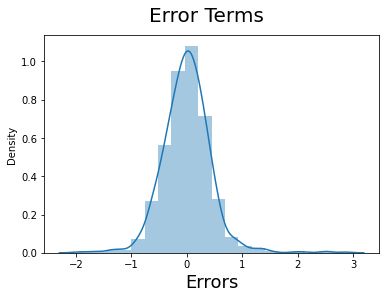

In [91]:
# To check whether the error terms are normally distributed, plot the error terms

fig = plt.figure()
sns.distplot((y_train - y_pred_train),bins = 20)
fig.suptitle("Error Terms", fontsize = 20)
plt.xlabel('Errors',fontsize = 18)
plt.show()

#### Inference : Error terms are normally distributed with mean 0 [ASSUMPTION No.2 - VALIDATED]

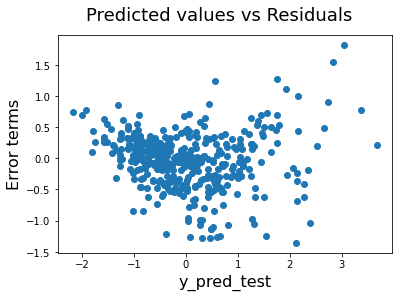

In [92]:
# Scatter plot for 'y_test_pred' vs 'errors'
# Residual = Actual value - Predicted value

res = y_test-y_pred_test
fig = plt.figure()
plt.scatter(y_pred_test,res)
fig.suptitle('Predicted values vs Residuals', fontsize = 18)             
plt.xlabel('y_pred_test', fontsize = 16)                          
plt.ylabel('Error terms', fontsize = 16)   
plt.show()

#### Inference from the scatter plot of 'Predicted values vs Residuals' :
__No specific patterns__ observed from the scatter plot of 'Predicted value' vs 'Residuals'. Thus, it shows that __the error terms are independent__ to each other with respect to predicted values __[ASSUMPTION No.3 - VALIDATED]__

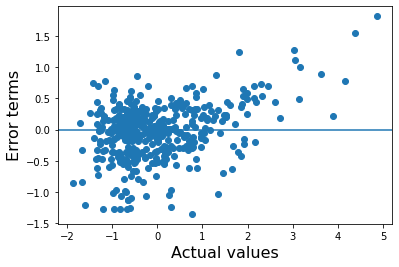

In [93]:
# Scatter plot for Actual values in test set vs residuals
# This is plotted to prove 'homoscedasticity'

plt.scatter(x=y_test, y=res)
plt.axhline(0)
fig.suptitle('Actual values vs Residuals', fontsize = 18)             
plt.xlabel('Actual values', fontsize = 16)                          
plt.ylabel('Error terms', fontsize = 16)   
plt.show()

#### Inference from the scatter plot of 'Actual values vs Residuals' :
 The plot __doesnot show any specific cone or wedge shape__. Hence, it is clear that the variance of the error terms remain constant along the values of the dependent variable; i.e.; __homoscedasticity__ exists __[ASSUMPTION No. 4 - VALIDATED]__<br><br>
From the __scatterplots and heatmap__ of house_pricing_df, we observed that some variables in the dataset have __linear relationship__ with the response variable __'SalePrice'__ which validates the __[ASSUMPTION No. 1]__.

In [94]:
# Function to plot Actual vs Predicted 
# Plot of Actual and predicted values with respect to index

def plot_actual_predicted(actual,predicted):
    c = [i for i in range(1,len(y_test)+1,1)]
    fig = plt.figure(figsize=(10,4))
    plt.plot(c,actual, color="blue", linewidth=2, linestyle="-")
    plt.plot(c,predicted, color="green",  linewidth=2, linestyle="-")
    fig.suptitle('Actual and Predicted demand Vs Index', fontsize=18)              
    plt.xlabel('Index', fontsize=16)                               
    plt.ylabel('Demand', fontsize=16)           

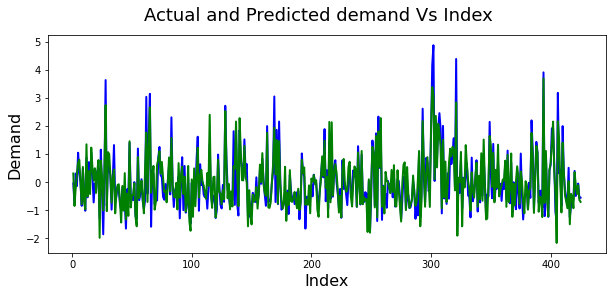

In [95]:
plot_actual_predicted(y_test,y_pred_test)

__Inference - The plot shows that the actual and predicted values are very close to each other except for some higher and lower peek values.__

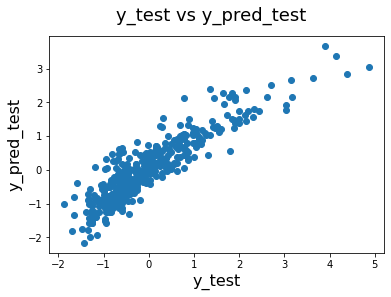

In [97]:
# Plotting y_test and y_test_pred (Linear regression with 5 features)

fig = plt.figure()
plt.scatter(y_test, y_pred_test)
fig.suptitle('y_test vs y_pred_test', fontsize = 18)              
plt.xlabel('y_test', fontsize = 16)                          
plt.ylabel('y_pred_test', fontsize = 16) 
plt.show()

#### Inference - Compared to previous model where we used 231 features, the bias was low but here the model is simple but bias is slightly high.

### C. Ridge Regression

In [98]:
# Applying Ridge Regression with various hyperparameter 'lambda'

lambdas = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 200, 1000, 10000, 100000]                          
for i in lambdas:                                     # for each lambda we get different model coefficients
    ridgereg = Ridge(alpha = i)                       # Initialize the Ridge Regression model with a specific lambda
    ridgereg.fit(X_train, y_train)                    # fit the model on the polynomial features    
    y_train_pred = ridgereg.predict(X_train)          # Predict the y-values of train data
    y_test_pred = ridgereg.predict(X_test)            # Predict the y-values of test data
    # Computing R2-score for train set
    print("\nR2-Score (Train set) for lambda ",i," is = " + str(r2_score(y_train, y_train_pred)))     
    # Computing R2-score for test set
    print("R2-Score (Test set) for lambda ",i," is = " + str(r2_score(y_test, y_test_pred))) 
    # print(ridgereg.coef_)                           # Model coefficients


R2-Score (Train set) for lambda  0.0001  is = 0.9417885138515274
R2-Score (Test set) for lambda  0.0001  is = 0.8943919759177175

R2-Score (Train set) for lambda  0.001  is = 0.941788512674756
R2-Score (Test set) for lambda  0.001  is = 0.8943947593004377

R2-Score (Train set) for lambda  0.01  is = 0.9417883969081087
R2-Score (Test set) for lambda  0.01  is = 0.8944221619485395

R2-Score (Train set) for lambda  0.1  is = 0.9417784889312031
R2-Score (Test set) for lambda  0.1  is = 0.8946590372656832

R2-Score (Train set) for lambda  1  is = 0.9414413682261195
R2-Score (Test set) for lambda  1  is = 0.895663602810135

R2-Score (Train set) for lambda  10  is = 0.9398172953777348
R2-Score (Test set) for lambda  10  is = 0.8979154254183208

R2-Score (Train set) for lambda  100  is = 0.9331470661244234
R2-Score (Test set) for lambda  100  is = 0.9006170818621794

R2-Score (Train set) for lambda  200  is = 0.927134598231389
R2-Score (Test set) for lambda  200  is = 0.8983194400823644

R2-S

### Inferences :
- It is observed that as the __lambda__ value __increases__, higher is the __regularisation__. <br>
- It is also evident that as the __regularisation increases, R2-Score drops__ significantly, (i.e, Bias is compromised more as variance shrinks).
- __Ridge regression__ pushes coefficients towards 0 but __not exactly 0__. So, we have all __231 features__ in the model, which is considered to be __quite complex and tedious__.

In [99]:
# Let us now determine the optimal value of lambda for Ridge Regression using cross validation
# List of alphas to tune - if value is too high it will lead to underfitting.
# If it is too low, it will not handle the overfitting.

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 
                    6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 200, 500, 1000 ]}

ridge = Ridge()

# Cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 29 candidates, totalling 145 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 200, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [100]:
# Printing the best hyperparameter alpha

print(model_cv.best_params_)

{'alpha': 100}


#### Inference : The optimal value of lambda for Ridge regression is 100.

In [101]:
# Fitting Ridge model for alpha = 100 

alpha = 100
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)

# print(ridge.coef_)

Ridge(alpha=100)

In [102]:
y_train_pred = ridge.predict(X_train)          # Predict the y-values of train data
y_test_pred = ridge.predict(X_test)            # Predict the y-values of test data


# Computing R2-score for train set
print("R2-Score (Train set) for lambda 100 in Ridge regression : " + str(r2_score(y_train, y_train_pred)))     
# Computing R2-score for test set
print("R2-Score (Test set) for lambda 100 in Ridge regression : " + str(r2_score(y_test, y_test_pred))) 
# Computing RSS for train set
print("\nRSS for train set in Ridge regression : " +str(np.sum(np.square(y_train - y_pred_train))))
# Computing RSS for test set
print("RSS for test set in Ridge regression : " +str(np.sum(np.square(y_test - y_pred_test))))
# Computing Mean squared error for train set
print("\nMean Squared Error for train set in Ridge regression : "+str(mean_squared_error(y_train, y_pred_train)))
# Computing Mean squared error for test set
print("Mean Squared Error for test set in Ridge regression : "+str(mean_squared_error(y_test, y_pred_test)))
# Computing Root mean squared error for train set
print("\nRoot Mean Squared Error for train set in Ridge regression : "+str((mean_squared_error(y_train, y_pred_train))**0.5))
# Computing Root mean squared error for test set
print("Root Mean Squared Error for test set in Ridge regression : "+str((mean_squared_error(y_test, y_pred_test))**0.5))

R2-Score (Train set) for lambda 100 in Ridge regression : 0.9331470661244234
R2-Score (Test set) for lambda 100 in Ridge regression : 0.9006170818621794

RSS for train set in Ridge regression : 191.47944270820827
RSS for test set in Ridge regression : 83.62107691511515

Mean Squared Error for train set in Ridge regression : 0.19341357849313967
Mean Squared Error for test set in Ridge regression : 0.1967554750943886

Root Mean Squared Error for train set in Ridge regression : 0.43978810635707244
Root Mean Squared Error for test set in Ridge regression : 0.44357127397340396


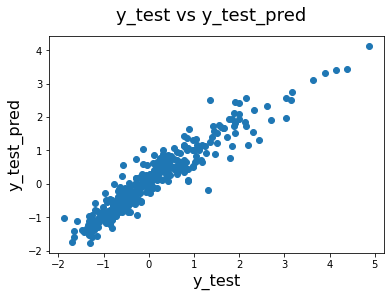

In [104]:
# Plotting y_test and y_test_pred (Ridge regression)

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 18)              
plt.xlabel('y_test', fontsize = 16)                          
plt.ylabel('y_test_pred', fontsize = 16) 
plt.show()

#### Inference - In Ridge regression, the variance is shrinked with slightly compromised bias, thereby balancing the bias-variance trade-off to get robust model.

### d. Lasso Regression

In [105]:
# Applying Lasso Regression with various hyperparameter 'lambda'

lambdas = [0, 0.0001, 0.001, 0.01, 0.02, 0.1, 1, 10, 100, 1000, 10000, 100000]                          
for i in lambdas:                                     # for each lambda we get different model coefficients
    lassoreg = Lasso(alpha = i)                       # Initialize the Lasso Regression model with a specific lambda
    lassoreg.fit(X_train, y_train)                    # fit the model on the polynomial features
    y_train_pred = lassoreg.predict(X_train)          # Predict the y-values of train data
    y_test_pred = lassoreg.predict(X_test)            # Predict the y-values of test data
    # Computing R2-score for train set
    print("\nR2-Score (Train set) for lambda ",i," is = " + str(r2_score(y_train, y_train_pred)))     
    # Computing R2-score for test set
    print("R2-Score (Test set) for lambda ",i," is = " + str(r2_score(y_test, y_test_pred))) 
    # print(lassoreg.coef_)                           # Model coefficients


R2-Score (Train set) for lambda  0  is = 0.9417499371732526
R2-Score (Test set) for lambda  0  is = -291.11136254665485

R2-Score (Train set) for lambda  0.0001  is = 0.9416244370907975
R2-Score (Test set) for lambda  0.0001  is = 0.8953484056495097

R2-Score (Train set) for lambda  0.001  is = 0.9387074622658349
R2-Score (Test set) for lambda  0.001  is = 0.900886445407455

R2-Score (Train set) for lambda  0.01  is = 0.9222593845661436
R2-Score (Test set) for lambda  0.01  is = 0.9004034223356157

R2-Score (Train set) for lambda  0.02  is = 0.9046150295145502
R2-Score (Test set) for lambda  0.02  is = 0.8841894811355179

R2-Score (Train set) for lambda  0.1  is = 0.8337284046713467
R2-Score (Test set) for lambda  0.1  is = 0.8266053686471022

R2-Score (Train set) for lambda  1  is = 0.0
R2-Score (Test set) for lambda  1  is = -0.0020101894010775556

R2-Score (Train set) for lambda  10  is = 0.0
R2-Score (Test set) for lambda  10  is = -0.0020101894010775556

R2-Score (Train set) for 

### Inferences :
- It is observed that as the __lambda__ value __increases__, higher is the __regularisation__. <br>
- It is also evident that as the __regularisation increases, R2-Score drops__ significantly, (i.e, Bias is compromised more as variance shrinks).
- __Lasso regression__ pushes some of the __coefficients to exactly 0,__ therby enabling __feature selection__.

In [106]:
# Let us now determine the optimal value of lambda for Lasso Regression using cross validation
# List of alphas to tune - if value is too high it will lead to underfitting.
# If it is too low, it will not handle the overfitting.

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 
                    6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 200, 500, 1000 ]}

lasso = Lasso()

# Cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 29 candidates, totalling 145 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 200, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [107]:
# Printing the best hyperparameter alpha

print(model_cv.best_params_)

{'alpha': 0.01}


#### Inference : The optimal value of lambda for Ridge regression is 100.

In [108]:
# Fitting Lasso model for alpha = 0.01

alpha = 0.01
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)
# print(lasso.coef_)

Lasso(alpha=0.01)

In [109]:
y_train_pred = lasso.predict(X_train)          # Predict the y-values of train data
y_test_pred = lasso.predict(X_test)            # Predict the y-values of test data


# Computing R2-score for train set
print("R2-Score (Train set) for lambda 0.01 in Lasso regression : " + str(r2_score(y_train, y_train_pred)))     
# Computing R2-score for test set
print("R2-Score (Test set) for lambda 0.01 in Lasso regression : " + str(r2_score(y_test, y_test_pred))) 
# Computing RSS for train set
print("\nRSS for train set in Lasso regression : " +str(np.sum(np.square(y_train - y_pred_train))))
# Computing RSS for test set
print("RSS for test set in Lasso regression : " +str(np.sum(np.square(y_test - y_pred_test))))
# Computing Mean squared error for train set
print("\nMean Squared Error for train set in Lasso regression : "+str(mean_squared_error(y_train, y_pred_train)))
# Computing Mean squared error for test set
print("Mean Squared Error for test set in Lasso regression : "+str(mean_squared_error(y_test, y_pred_test)))
# Computing Root mean squared error for train set
print("\nRoot Mean Squared Error for train set in Lasso regression : "+str((mean_squared_error(y_train, y_pred_train))**0.5))
# Computing Root mean squared error for test set
print("Root Mean Squared Error for test set in Lasso regression : "+str((mean_squared_error(y_test, y_pred_test))**0.5))

R2-Score (Train set) for lambda 0.01 in Lasso regression : 0.9222593845661436
R2-Score (Test set) for lambda 0.01 in Lasso regression : 0.9004034223356157

RSS for train set in Lasso regression : 191.47944270820827
RSS for test set in Lasso regression : 83.62107691511515

Mean Squared Error for train set in Lasso regression : 0.19341357849313967
Mean Squared Error for test set in Lasso regression : 0.1967554750943886

Root Mean Squared Error for train set in Lasso regression : 0.43978810635707244
Root Mean Squared Error for test set in Lasso regression : 0.44357127397340396


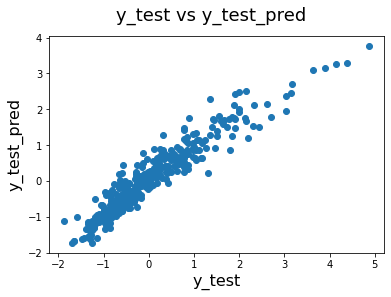

In [110]:
# Plotting y_test and y_test_pred (Lasso regression)

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 18)              
plt.xlabel('y_test', fontsize = 16)                          
plt.ylabel('y_test_pred', fontsize = 16) 
plt.show()

#### Inference - In Lasso regression, regularisation is done to shrink variance, meanwhile preventing the model being complex unnecessarily. As feature selection is aided by Lasso, it is considered better than Ridge where all features are included in the model.

In [111]:
# Storing the coefficients of 'Linear','Ridge' and 'Lasso' regression models in a dataframe to compare parameters

betas = pd.DataFrame(index=X_train.columns, 
                     columns = ['Linear Regression', 'Ridge Regression', 'Lasso Regression'])
betas['Linear Regression'] = linreg_model.params #Linear regression coefficients
betas['Ridge Regression'] = ridge.coef_          # Ridge Regression
betas['Lasso Regression'] = lasso.coef_          # Lasso Regression
# betas

In [112]:
(betas[~(betas['Lasso Regression']==0.0)]).shape

(88, 3)

#### Inference - Number of features selected by Lasso regression : 88

In [113]:
# (betas.sort_values(by = ['Ridge Regression'], ascending = False))

In [114]:
# (betas[~(betas['Lasso Regression']==0.0)].sort_values(by = ['Lasso Regression'], ascending = False))

## 5. Interpretation of results

### Without Regularisation : 
- The __number of features__ in __Linear regression__ to be selected by __RFE__ is tuned and is found to be : __5__<br>
-  __5 variables that are significant in predicting the price of a house obtained from Linear regression using RFE are :__
>1. OverallQual
>2. TotalBsmtSF
>3. GrLivArea
>4. ExterQual_Gd
>5. ExterQual_TA

#### Equation for predicting the price of a house obtained from Linear regression using RFE is given by :

#### 5 most significant features selected by RFE with their coefficients is given to know how well these features describe the price of the house.

__SALE PRICE__ = 0.0098 + (0.3528 * __OverallQual__) + (0.2516 * __TotalBsmtSF__) + (0.3848 * __GrLivArea__) + <br>&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;(-0.2857 * __ExterQual_Gd__) + (-0.3828 * __ExterQual_TA__) <br><br>

### With Regularisation : 
- __Optimal value__ of lambda for __Ridge__ regression is __100__.<br>
- __Optimal value__ of lambda for __Lasso__ regression is __0.01__.<br>
- The __number of features__ selected by __Lasso regression__ for lambda 0.01 is __88__.

#### Variables that are significant in predicting the price of a house (with regularisation) obtained from Ridge and Lasso regression are :
   - GrLivArea	
   - OverallQual	
   - SaleType_New	
   - Neighborhood_NridgHt	
   - TotalBsmtSF	
   - BsmtExposure_Gd	
   - GarageCars
   - BsmtQual_Gd	
   - Age_from_YearBuilt	
   - KitchenQual_TA	
   - KitchenQual_Gd	
   - LotArea
   - Neighborhood_StoneBr	
   - OverallCond	

In [115]:
significant_params_list = ['GrLivArea','OverallQual','SaleType_New','Neighborhood_NridgHt','TotalBsmtSF',
                           'BsmtExposure_Gd','GarageCars','BsmtQual_Gd','Age_from_YearBuilt','KitchenQual_TA',
                           'KitchenQual_Gd','LotArea','Neighborhood_StoneBr','OverallCond']

In [116]:
# Significance of the variables with coefficients in Linear, Ridge and Lasso regression 
# This is to observe how well these variables influence the price of the house

(betas.loc[significant_params_list,:]).sort_values(by = ['Lasso Regression','Ridge Regression','Linear Regression'],
                                                   ascending = False)

,Linear Regression,Ridge Regression,Lasso Regression
GrLivArea,0.346673,0.212515,0.356475
OverallQual,0.100064,0.130252,0.174764
SaleType_New,0.381511,0.058053,0.104234
Neighborhood_NridgHt,0.043812,0.077430,0.084060
TotalBsmtSF,0.227253,0.127446,0.082212
BsmtExposure_Gd,0.083880,0.074007,0.078602
GarageCars,0.065137,0.079407,0.070929
Neighborhood_StoneBr,0.068044,0.070740,0.064117
OverallCond,0.089532,0.060387,0.058166
LotArea,0.096238,0.072536,0.057349
